- 데이터셋 분석대상 기간 : <br>
2017-01-01 ~ 2018-08-31 (1년 8개월) <br>


- 출처 : <br>
https://www.kaggle.com/olistbr/brazilian-ecommerce <br>
https://www.kaggle.com/olistbr/marketing-funnel-olist


- 분석 주제 :<br>
 -> Olist 셀러, 판매월, 제품카테고리 중 평균 review_score가 낮은 건들을 확인하고<br>
 -> 해당 계정들에서 공통적으로 관찰되는 문제점을 파악하여 review_score 개선 전략을 세우자
 
 
- 분석 단계 :<br>
 -> 1단계 : 셀러별 월별 매출액, 판매횟수 및 기타 특징을 입력변수로 사용한 군집화 (등급)<br>
 -> 2단계 : 해당 등급 및 기타 특징을 입력변수로 사용한 review_score 예측<br>
 -> 3단계 : review_score에 영향을 미친 요인을 구체적으로 확인하기 위한 워드클라우드 확인

In [800]:
%autosave 0

Autosave disabled


In [801]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", -1)

# 데이터셋 불러오기

## olist_sellers_dataset

In [802]:
seller = pd.read_csv('olist_sellers_dataset.csv')
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [803]:
seller.describe(include = 'O')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,59b22a78efb79a4797979612b885db36,sao paulo,SP
freq,1,694,1849


In [804]:
seller.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## olist_order_items_dataset

In [805]:
item = pd.read_csv('olist_order_items_dataset.csv')
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [806]:
item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [807]:
item.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [808]:
item[item['order_item_id'] > 10]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11942,1b15974a0141d54e36626dca3fdc731a,11,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11943,1b15974a0141d54e36626dca3fdc731a,12,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11944,1b15974a0141d54e36626dca3fdc731a,13,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11945,1b15974a0141d54e36626dca3fdc731a,14,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11946,1b15974a0141d54e36626dca3fdc731a,15,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
...,...,...,...,...,...,...,...
75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
77085,af822dacd6f5cff7376413c03a388bb7,11,62995b7e571f5760017991632bbfd311,98dac6635aee4995d501a3972e047414,2018-06-13 17:30:35,5.31,15.23
77086,af822dacd6f5cff7376413c03a388bb7,12,62995b7e571f5760017991632bbfd311,98dac6635aee4995d501a3972e047414,2018-06-13 17:30:35,5.31,15.23
84668,c05d6a79e55da72ca780ce90364abed9,11,710b7c26b7a742f497bba45fab91a25f,98dac6635aee4995d501a3972e047414,2018-05-17 13:31:00,21.15,5.54


In [809]:
# 동일 셀러에게 동일 제품을 여러개 주문한 경우, 아래와 같이 나머지 데이터는 모두 같고 order_item_id만 다르게 표시됨
item[item['order_id'] == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


## olist_orders_dataset

In [810]:
order =  pd.read_csv('olist_orders_dataset.csv')
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [811]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,4d9e1d72435984adb22e59511ff36b7c,6c9a9031dd1214977dfef7ef3338988e,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [812]:
order.describe(include = 'O')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,4d9e1d72435984adb22e59511ff36b7c,6c9a9031dd1214977dfef7ef3338988e,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## olist_products_dataset

In [813]:
product = pd.read_csv('olist_products_dataset.csv')
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [814]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [815]:
product.describe(include = 'O')

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,efdf96511632c6f9747717c41611f09d,cama_mesa_banho
freq,1,3029


## product_category_name_translation

In [816]:
name = pd.read_csv('product_category_name_translation.csv')
name.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


8) olist_geolocation_dataset

In [817]:
geo = pd.read_csv('olist_geolocation_dataset.csv')
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## olist_order_reviews_dataset

In [818]:
review = pd.read_csv('olist_order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [819]:
review['review_score'].count()

100000

In [820]:
review.describe(include = 'O')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,11715,41753,100000,100000
unique,99173,99441,4600,36921,637,99010
top,0c76e7a547a531e7bf9f0b99cba071c1,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,426,230,466,4


## olist_order_payments_dataset

In [821]:
payment = pd.read_csv('olist_order_payments_dataset.csv')
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [822]:
# payment sequential : 같은 주문 내 몇개의 결제수단을 사용했는지
# payment installments : 할부
payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [823]:
payment.describe(include = 'O')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [824]:
payment['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher        5775 
debit_card     1529 
not_defined    3    
Name: payment_type, dtype: int64

## olist_customers_dataset

In [825]:
customer = pd.read_csv('olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [826]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

# 데이터 통합 및 EDA

## item 데이터셋 전처리

In [827]:
# price(제품 가격)과 freight_value(배송비)를 더한 'revenue' 컬럼 생성
item['total_payment'] = item['price'] + item['freight_value']
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


In [828]:
# 동일 셀러에게 동일 제품을 여러개 주문한 경우의 데이터 합치기
item = item.groupby(['order_id','product_id','seller_id','shipping_limit_date','price','freight_value']).agg(
    {'order_item_id' : 'count', 'total_payment' : 'sum'}).reset_index().rename(columns = {'order_item_id' : 'item_num'})
item

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71


## seller_id x order_id

### 셀러별 판매건수 확인

In [829]:
# 전체 셀러 : 3095명
seller_order = item.groupby('seller_id')['order_id'].agg('count').sort_values(ascending = False)
seller_order = seller_order.reset_index()
seller_order

,seller_id,order_id
0,6560211a19b47992c3666cc44a7e94c0,1982
1,4a3ca9315b744ce9f8e9374361493884,1889
2,cc419e0650a3c5ba77189a1882b7556a,1720
3,1f50f920176fa81dab994f9023523100,1473
4,da8622b14eb17ae2831f4ac5b9dab84a,1438
...,...,...
3090,75fdd0a732287f9497b179f6bd445d32,1
3091,b9de031b671cd48b28fae9d828cbf2b4,1
3092,24c1de8d9551c0b4fbc53317d53efda8,1
3093,ba8e85df286308fe68a2ce83a8f8b2d6,1


In [830]:
# 판매를 2건 이상 한 셀러 : 2532명
seller_order[seller_order['order_id'] > 1]

,seller_id,order_id
0,6560211a19b47992c3666cc44a7e94c0,1982
1,4a3ca9315b744ce9f8e9374361493884,1889
2,cc419e0650a3c5ba77189a1882b7556a,1720
3,1f50f920176fa81dab994f9023523100,1473
4,da8622b14eb17ae2831f4ac5b9dab84a,1438
...,...,...
2527,4eeb99008a0f59d2c7759c59f9a346eb,2
2528,63272377184e969942f7fff221be858d,2
2529,78ba5933c21686d1c2f64669c8c459e7,2
2530,6c9875b2f94ba781186f0c1aed8d1687,2


array([[<AxesSubplot:title={'center':'order_id'}>]], dtype=object)

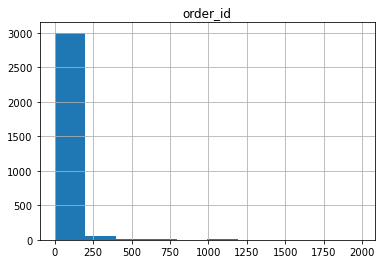

In [831]:
# 전체 셀러 판매건수 분포 확인
seller_order.hist()

array([[<AxesSubplot:title={'center':'order_id'}>]], dtype=object)

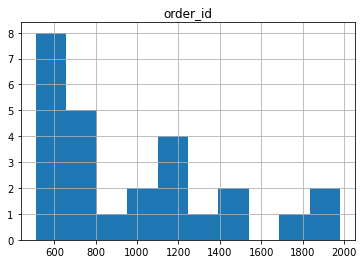

In [832]:
# 판매 건수가 500 이상인 셀러 판매건수 분포 확인
seller_order[seller_order['order_id'] > 500].hist()

In [833]:
# 전체 셀러 중 2건 이상 판매한 셀러 비율 : 약 81.8%
seller_order[seller_order['order_id'] > 1].shape[0] / seller_order.shape[0]

0.8180936995153474

### 주문별 판매 아이템수(num) 확인

In [834]:
# order_id별 판매 아이템수(num)는 1~8 사이에 분포
seller_orderitem = item.groupby('order_id')['item_num'].count().sort_values(ascending = False)
seller_orderitem = seller_orderitem.reset_index()
seller_orderitem

,order_id,item_num
0,ca3625898fbd48669d50701aba51cd5f,8
1,7d8f5bfd5aff648220374a2df62e84d5,7
2,77df84f9195be22a4e9cb72ca9e8b4c2,7
3,ad850e69fce9a512ada84086651a2e7d,7
4,3990f96693d321ac142fff312bf3706a,6
...,...,...
98661,a9d9773efe0a981195d2861250cff4d9,1
98662,a9d9e48bc0905664f33c53779b5edfb6,1
98663,a9da0d64f6c4dff3f3f383f6b076b24a,1
98664,a9da66f1dfe4cca8956f5e74619c2cb9,1


In [835]:
# 동일 order_id에 다양한 product_id, seller_id가 있는 경우
item[item['order_id']=='ca3625898fbd48669d50701aba51cd5f']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment
80867,ca3625898fbd48669d50701aba51cd5f,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84,1,35.74
80868,ca3625898fbd48669d50701aba51cd5f,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67,2,325.34
80869,ca3625898fbd48669d50701aba51cd5f,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84,1,310.84
80870,ca3625898fbd48669d50701aba51cd5f,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15,1,63.85
80871,ca3625898fbd48669d50701aba51cd5f,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68,2,119.36
80872,ca3625898fbd48669d50701aba51cd5f,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15,1,110.05
80873,ca3625898fbd48669d50701aba51cd5f,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,1,96.05
80874,ca3625898fbd48669d50701aba51cd5f,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,1,96.05


In [836]:
# 같은 셀러에게 같은 아이템을 여러개 구매한 경우 아래와 같이 'num' 컬럼에 개수가 표시됨
item[item['order_id']=='428a2f660dc84138d969ccd69a0ab6d5']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment
26550,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,15,1225.65


array([[<AxesSubplot:title={'center':'item_num'}>]], dtype=object)

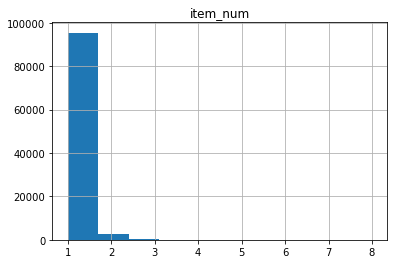

In [837]:
# 주문당 판매 아이템 수 분포 확인
seller_orderitem.hist()

array([[<AxesSubplot:title={'center':'item_num'}>]], dtype=object)

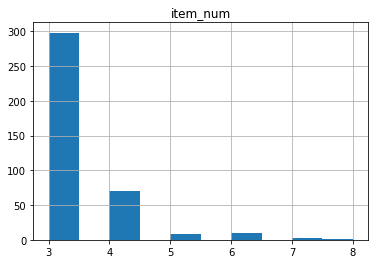

In [838]:
# 주문당 판매 아이템 수가 2 이상인 판매 아이템 수 분포 확인
seller_orderitem[seller_orderitem['item_num'] > 2].hist()

In [839]:
# 한 order_id에 num 2개 이상인 경우 : 약 3.3%
seller_orderitem[seller_orderitem['item_num'] > 1].shape[0] / seller_orderitem.shape[0]

0.032797518902154744

## seller_id x revenue

### 셀러별 price, freight_value, revenue 확인

In [840]:
# 셀러별 총매출은 약 12 ~ 249640 BRL (약 2,400 ~ 50,130,000원) 사이에 분포
# 총매출은 판매기간에 따라 다를수밖에 없으므로 월별 매출로 비교할 필요가 있음
seller_revenue = item.groupby('seller_id')[['price', 'freight_value', 'total_payment']].agg('sum').sort_values(by = 'total_payment', ascending = False)
seller_revenue

,price,freight_value,total_payment
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,227406.24,19938.61,249640.70
7c67e1448b00f6e969d365cea6b010ab,143385.27,38677.08,239536.44
53243585a1d6dc2643021fd1853d8905,208199.61,11750.24,235856.68
4a3ca9315b744ce9f8e9374361493884,191178.72,33209.72,235539.96
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,10042.70,204084.73
...,...,...,...
702835e4b785b67a084280efca355756,7.60,10.96,18.56
4965a7002cca77301c82d3f91b82e1a9,8.49,7.87,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,6.90,9.00,15.90


<AxesSubplot:>

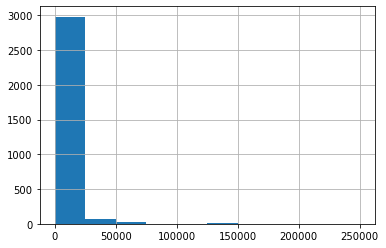

In [841]:
# 셀러별 총매출 분포 확인
seller_revenue['total_payment'].hist()

In [842]:
# 셀러별 order_id당 매출은 약12 ~ 6922 BRL (약 2,400 ~ 1,390,000원) 사이에 분포
seller_item_total_payment = item.groupby('seller_id')[['order_id', 'total_payment']].agg({'order_id' : 'count', 'total_payment' : 'sum'})
seller_item_total_payment['total_payment_per_order'] = seller_item_total_payment['total_payment'] / seller_item_total_payment['order_id']
seller_item_total_payment.sort_values(by = 'total_payment_per_order', ascending = False)

,order_id,total_payment,total_payment_per_order
seller_id,,,
80ceebb4ee9b31afb6c6a916a574a1e2,1,6922.21,6922.21
ee27a8f15b1dded4d213a468ba4eb391,1,6726.66,6726.66
b37c4c02bda3161a7546a4e6d222d5b2,4,24487.60,6121.90
585175ec331ea177fa47199e39a6170a,1,3602.47,3602.47
abe021b01ba992245271b9aa422032df,2,6837.24,3418.62
...,...,...,...
702835e4b785b67a084280efca355756,1,18.56,18.56
4965a7002cca77301c82d3f91b82e1a9,1,16.36,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,1,15.90,15.90


array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'total_payment'}>],
       [<AxesSubplot:title={'center':'total_payment_per_order'}>,
        <AxesSubplot:>]], dtype=object)

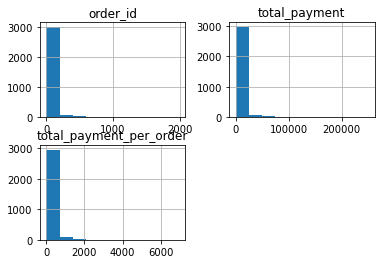

In [843]:
seller_item_total_payment.hist()

### ★item, order 데이터셋 합치기

In [844]:
item.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date
count,102425,102425,102425,102425
unique,98666,32951,3095,93318
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-11-29 02:36:26
freq,8,467,1982,7


In [845]:
order.describe(include = 'O')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,4d9e1d72435984adb22e59511ff36b7c,6c9a9031dd1214977dfef7ef3338988e,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [846]:
item_order = item.merge(order, on = 'order_id', how = 'left')
item_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [847]:
item_order.isnull().sum()

order_id                         0   
product_id                       0   
seller_id                        0   
shipping_limit_date              0   
price                            0   
freight_value                    0   
item_num                         0   
total_payment                    0   
customer_id                      0   
order_status                     0   
order_purchase_timestamp         0   
order_approved_at                14  
order_delivered_carrier_date     1028
order_delivered_customer_date    2230
order_estimated_delivery_date    0   
dtype: int64

In [848]:
# 구매월 컬럼 생성
item_order['purchase_month'] = item_order['order_purchase_timestamp'].str[0:7]
item_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-04
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08


In [849]:
# 셀러별 월매출은 약 10 ~ 67113 BRL (약 2,000 ~ 13,476,000원) 사이에 분포
item_order_month = item_order.groupby(['seller_id', 'purchase_month'])[['order_id', 'total_payment']].agg(
    {'order_id' : 'count', 'total_payment' : 'sum'})
item_order_month.sort_values(by = 'total_payment', ascending = False)

order_id  total_payment
seller_id                        purchase_month                         
53243585a1d6dc2643021fd1853d8905 2017-09         83        67113.00     
                                 2017-10         49        43332.35     
                                 2017-08         34        35787.67     
7d13fca15225358621be4086e1eb0964 2018-05         207       33484.81     
7c67e1448b00f6e969d365cea6b010ab 2018-03         146       33165.34     
...                                              ...            ...     
9cea4682e16655f7da87f406902e989e 2017-06         1         12.89        
cf6f6bc4df3999b9c6440f124fb2f687 2017-05         1         12.22        
94b9108d4b637ba65bb4f1e53cfcf8d8 2017-09         1         11.63        
                                 2017-10         1         11.63        
0e44d110fa6a54e121cb2c095a77762f 2017-09         1         10.07        

[16441 rows x 2 columns]

<AxesSubplot:>

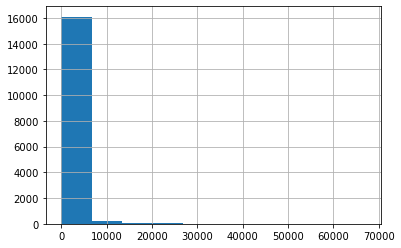

In [850]:
# 셀러별 월 매출 분포 확인
item_order_month['total_payment'].hist()

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'total_payment'}>]], dtype=object)

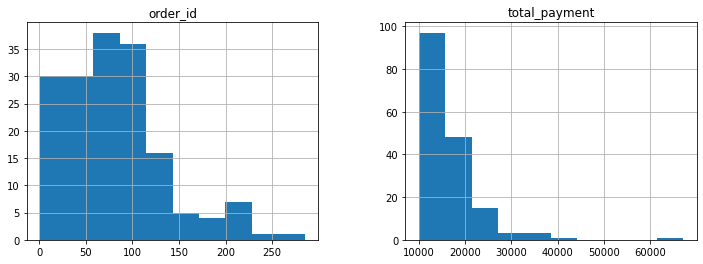

In [851]:
# 셀러별 월 매출이 10000 이상인 경우 월 주문건수, 매출 확인
item_order_month[item_order_month['total_payment'] > 10000].hist(figsize = (12,4))

In [852]:
# reset_index
item_order_month = item_order_month.reset_index()
item_order_month

,seller_id,purchase_month,order_id,total_payment
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,1,916.02
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,2,1832.04
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,5,1295.40
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,11,2124.00
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,14,2243.22
...,...,...,...,...
16436,fffd5413c0700ac820c7069d66d98c89,2018-08,4,624.33
16437,ffff564a4f9085cd26170f4732393726,2016-10,2,146.97
16438,ffff564a4f9085cd26170f4732393726,2017-01,6,327.38
16439,ffff564a4f9085cd26170f4732393726,2017-03,11,1173.24


### 월별 주문수, 매출 기준 셀러 데이터 확인

In [853]:
# 주문수 기준
by_order_id = item_order_month.sort_values(by = 'order_id', ascending = False)
by_order_id = by_order_id.reset_index(drop = True)
by_order_id

,seller_id,purchase_month,order_id,total_payment
0,1f50f920176fa81dab994f9023523100,2017-11,285,25534.97
1,955fee9216a65b617aa5c0531780ce60,2018-01,230,21668.92
2,7d13fca15225358621be4086e1eb0964,2018-05,207,33484.81
3,955fee9216a65b617aa5c0531780ce60,2018-04,206,25657.73
4,6560211a19b47992c3666cc44a7e94c0,2018-07,205,16772.21
...,...,...,...,...
16436,7bb8fac2913a6064ec412e583c6d8b4d,2018-02,1,125.52
16437,7bac63f6603d382cc8d0832eb6c100a8,2018-08,1,599.26
16438,7bac63f6603d382cc8d0832eb6c100a8,2018-01,1,418.04
16439,7bac63f6603d382cc8d0832eb6c100a8,2017-12,1,43.33


In [854]:
# 매출액 기준
by_revenue = item_order_month.sort_values(by = 'total_payment', ascending = False)
by_revenue = by_revenue.reset_index(drop = True)
by_revenue

,seller_id,purchase_month,order_id,total_payment
0,53243585a1d6dc2643021fd1853d8905,2017-09,83,67113.00
1,53243585a1d6dc2643021fd1853d8905,2017-10,49,43332.35
2,53243585a1d6dc2643021fd1853d8905,2017-08,34,35787.67
3,7d13fca15225358621be4086e1eb0964,2018-05,207,33484.81
4,7c67e1448b00f6e969d365cea6b010ab,2018-03,146,33165.34
...,...,...,...,...
16436,9cea4682e16655f7da87f406902e989e,2017-06,1,12.89
16437,cf6f6bc4df3999b9c6440f124fb2f687,2017-05,1,12.22
16438,94b9108d4b637ba65bb4f1e53cfcf8d8,2017-09,1,11.63
16439,94b9108d4b637ba65bb4f1e53cfcf8d8,2017-10,1,11.63


## product_category

### ★product, name, category 데이터셋 합치기

In [855]:
product.isnull().sum()

product_id                    0  
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g              2  
product_length_cm             2  
product_height_cm             2  
product_width_cm              2  
dtype: int64

In [856]:
# product_category_name 컬럼의 포르투갈어를 영어와 매칭하기 위해 product, name 데이터셋 합치기 
prod = product.merge(name, how = 'left', on = 'product_category_name')
prod

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [857]:
# product_category_name_english에는 product_category_name에 있는 단어 2개가 빠져있음을 확인 (뒤에서 해당값 찾아서 대체)
prod.describe(include = 'O')

,product_id,product_category_name,product_category_name_english
count,32951,32341,32328
unique,32951,73,71
top,efdf96511632c6f9747717c41611f09d,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [858]:
# 영문상품명 데이터에 'food_drink','food', 'drinks' 등 겹치는 카테고리가 다수 존재함을 확인
prod['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [859]:
# 겹치는 카테고리 재분류를 진행한 category.csv 파일 불러와 prod와 합치기
category = pd.read_csv('categorizing.csv', names = ['product_category_name_english', 'new_category'])
prod_rename = prod.merge(category, on = 'product_category_name_english', how = 'outer')
prod_rename

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,beauty
...,...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery,furniture
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,furniture
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery,furniture
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery,furniture


###  ★product_category_english_name 없는 데이터 처리

In [860]:
# 포르투갈어, 영문명 상품정보가 모두 없는 데이터는 제거
prod_rename = prod_rename[~prod_rename['product_category_name'].isnull()]
prod_rename

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,beauty
...,...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery,furniture
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,furniture
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery,furniture
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery,furniture


In [861]:
# 상품명 정보가 포르투갈어로만 존재하는 데이터 확인
prod_rename.loc[(prod_rename['new_category'].isnull()), 'product_category_name']

29651    pc_gamer                                     
29723    portateis_cozinha_e_preparadores_de_alimentos
29755    portateis_cozinha_e_preparadores_de_alimentos
29759    pc_gamer                                     
29779    portateis_cozinha_e_preparadores_de_alimentos
29825    portateis_cozinha_e_preparadores_de_alimentos
29880    portateis_cozinha_e_preparadores_de_alimentos
29918    portateis_cozinha_e_preparadores_de_alimentos
29933    pc_gamer                                     
29953    portateis_cozinha_e_preparadores_de_alimentos
29972    portateis_cozinha_e_preparadores_de_alimentos
30107    portateis_cozinha_e_preparadores_de_alimentos
30165    portateis_cozinha_e_preparadores_de_alimentos
Name: product_category_name, dtype: object

In [862]:
# 재분류한 영문상품명 중 해당하는 카테고리명 할당
# pc_gamer -> games
# portateis_cozinha_e_preparadores_de_alimentos -> home_living
prod_rename.loc[(prod_rename['new_category'].isnull()) & (prod_rename['product_category_name'] == 'pc_gamer'),
           'new_category'] = 'games'
prod_rename.loc[(prod_rename['new_category'].isnull()) & (prod_rename['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'),
           'new_category'] = 'home_living'

### ★item, prod_rename 데이터셋 합치기

In [863]:
prod_order = item.merge(prod_rename, how = 'left', on = 'product_id')
prod_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,pet
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,furniture
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,home_appliances
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,electronics
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,sports
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,electronics


In [864]:
prod_order.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,new_category
count,102425,102425,102425,102425,100965,100943,100965
unique,98666,32951,3095,93318,73,71,21
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-11-29 02:36:26,cama_mesa_banho,bed_bath_table,stationery
freq,8,467,1982,7,10160,10160,17037


In [865]:
prod_order.isnull().sum()

order_id                         0   
product_id                       0   
seller_id                        0   
shipping_limit_date              0   
price                            0   
freight_value                    0   
item_num                         0   
total_payment                    0   
product_category_name            1460
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                 1461
product_length_cm                1461
product_height_cm                1461
product_width_cm                 1461
product_category_name_english    1482
new_category                     1460
dtype: int64

In [866]:
# 포르투갈어, 영문명 상품정보가 모두 없는 데이터 제외
prod_order = prod_order[~prod_order['product_category_name'].isnull()]
prod_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,pet
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,furniture
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,home_appliances
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,electronics
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,sports
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,electronics


In [867]:
# 전체 판매제품 중 가장 많이 팔린 카테고리 제품 보기
prod_order_sorted = prod_order.groupby('new_category')['product_category_name'].agg('count').sort_values(ascending = False)
popular_prod = prod_order_sorted.head(30).to_frame()
popular_prod

,product_category_name
new_category,
stationery,17037
beauty,12264
home_living,10879
electronics,10316
furniture,8647
sports,7858
home_appliances,7725
telephone,4504
auto,3991


<AxesSubplot:xlabel='new_category', ylabel='product_category_name'>

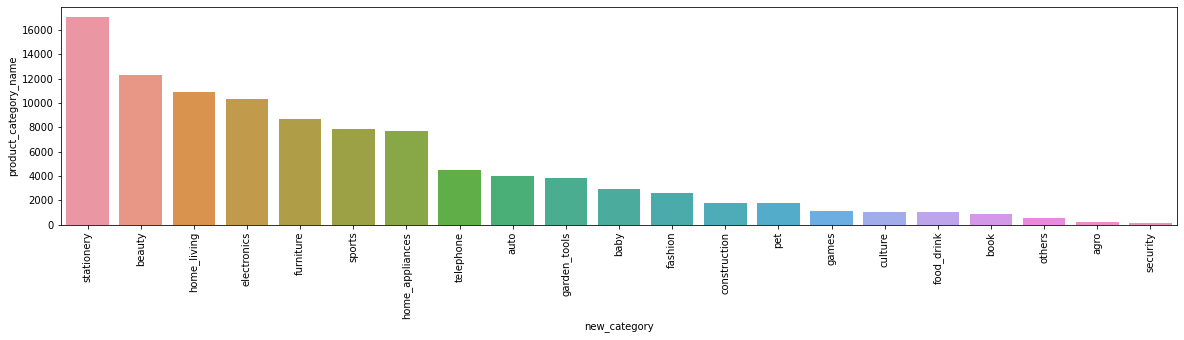

In [868]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation = 90)

sns.barplot(data = popular_prod, x = popular_prod.index, y = 'product_category_name')

In [869]:
# 판매건수 기준 Top1 seller 판매제품 카테고리
prod_order[prod_order['seller_id'] == '6560211a19b47992c3666cc44a7e94c0'].groupby(
    'new_category')['product_category_name'].agg('count').sort_values(ascending = False)

new_category
stationery      1585
fashion         336 
electronics     42  
beauty          11  
sports          7   
construction    1   
Name: product_category_name, dtype: int64

In [870]:
# 판매금액 기준 Top1 seller 판매제품 카테고리
prod_order[prod_order['seller_id'] == '4869f7a5dfa277a7dca6462dcf3b52b2'].groupby(
    'new_category')['product_category_name'].agg('count').sort_values(ascending = False)

new_category
stationery     1043
electronics    68  
beauty         20  
games          7   
telephone      3   
sports         1   
auto           1   
Name: product_category_name, dtype: int64

## review_score

### ★item_order, review 데이터셋 합치기

In [871]:
item_order.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
count,102425,102425,102425,102425,102425,102425,102425,102411,101397,100195,102425,102425
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-11-29 02:36:26,0d861a5e4dd6a9079d89e1330848f0ab,delivered,2018-08-12 02:11:20,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-08-21 12:18:48,2017-12-20 00:00:00,2017-11
freq,8,467,1982,7,8,100196,8,9,47,8,541,7782


In [872]:
review.describe(include = 'O')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,11715,41753,100000,100000
unique,99173,99441,4600,36921,637,99010
top,0c76e7a547a531e7bf9f0b99cba071c1,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,426,230,466,4


In [873]:
# item 데이터셋에는 없고 order, review 데이터셋에만 정보가 있는 아래 데이터를 살펴보면
# order_status가 delivered가 아닌 경우의 데이터가 order, review에 추가로 포함된 경우가 있는 것으로 파악됨
item[item['order_id']=='f62f01ec64c6b221f926ba560907d8f7']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment


In [874]:
order[order['order_id']=='f62f01ec64c6b221f926ba560907d8f7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
64186,f62f01ec64c6b221f926ba560907d8f7,a35ef57cd99a99e77e58316ab0cc2927,unavailable,2017-02-14 20:55:49,2017-02-14 21:05:27,NaN,NaN,2017-04-03 00:00:00


In [875]:
# 해당 건들은 item 데이터셋에 정보가 없어 분석에 필요한 주요 정보가 확인되지 않으므로 분석에서 제외 (item 데이터셋 기준으로 통합)
item_order_review = item_order.merge(review, how = 'left', on = 'order_id')
item_order_review

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103030,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-04,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
103031,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
103032,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
103033,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08,fba117c9ac40d41ca7be54741f471303,5,NaN,R

### ★item_order_review, prod_order 합치기

In [876]:
item_order_review.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,103035,103035,103035,103035,103035,103035,103035,103021,101998,100784,103035,103035,103035,12212,43362,103035,103035
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24,98453,4569,36435,634,98291
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2017-12-19 00:00:00,2018-08-24 17:07:04
freq,12,470,1988,12,12,100785,12,12,47,12,547,7841,8,439,236,473,8


In [877]:
prod_rename.describe(include = 'O')

,product_id,product_category_name,product_category_name_english,new_category
count,32341,32341,32328,32341
unique,32341,73,71,21
top,efdf96511632c6f9747717c41611f09d,cama_mesa_banho,bed_bath_table,stationery
freq,1,3029,3029,4818


In [878]:
prod_rename.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty


In [879]:
# prod_rename 데이터셋에는 없고 item_order_review 데이터셋에만 정보가 있는 데이터는
# 분석에 필요한 주요 정보가 확인되지 않으므로 분석에서 제외 (prod_rename 데이터셋 기준으로 통합)
df = item_order_review.merge(prod_rename, on = 'product_id', how = 'right')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,culture
101562,9c782cb7854e5dfa91927cfca8949eb8,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c3

In [880]:
df.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
item_num                         0    
total_payment                    0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                13   
order_delivered_carrier_date     1003 
order_delivered_customer_date    2191 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             89424
review_comment_message           58850
review_creation_date             0    
review_answer_timestamp          0    
product_category_name            0    
product_name_lenght              0    
product_description_lenght       0    
product_photos_qty       

## geolocation

### ★한 zipcode에 여러 state명 있는 경우

In [881]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [882]:
# zipcode별로 state 개수 확인
zip_code = geo[["geolocation_zip_code_prefix","geolocation_state"]].drop_duplicates().groupby(
    ["geolocation_zip_code_prefix"]).geolocation_state.count().sort_values().reset_index()
zip_code

,geolocation_zip_code_prefix,geolocation_state
0,1001,1
1,62010,1
2,62000,1
3,61979,1
4,61962,1
...,...,...
19010,79750,2
19011,2116,2
19012,80630,2
19013,4011,2


In [883]:
# zipcode별 state가 2개인 데이터 확인
zipcode = zip_code[zip_code.geolocation_state > 1].geolocation_zip_code_prefix.tolist()
zipcode

[23056, 78557, 21550, 79750, 2116, 80630, 4011, 72915]

In [884]:
# 위 데이터는 모두 1건씩 다른 state 정보가 잘못 들어간 경우로 파악됨
geo[geo['geolocation_zip_code_prefix']==72915].groupby(
    "geolocation_state")['geolocation_zip_code_prefix'].count().sort_values()

geolocation_state
DF    1 
GO    40
Name: geolocation_zip_code_prefix, dtype: int64

In [885]:
# 가장 많이 등록된 state로 대체
for loc in zipcode:
    set_states = geo[geo['geolocation_zip_code_prefix']==loc].groupby(
        "geolocation_state")['geolocation_zip_code_prefix'].count().sort_values().index[-1]
    geo.loc[geo['geolocation_zip_code_prefix']==loc, "geolocation_state"] = set_states

In [886]:
zip_code = geo[["geolocation_zip_code_prefix","geolocation_state"]].drop_duplicates().groupby(
    ["geolocation_zip_code_prefix"]).geolocation_state.count().sort_values().reset_index()
zip_code

,geolocation_zip_code_prefix,geolocation_state
0,1001,1
1,62014,1
2,62011,1
3,62010,1
4,62000,1
...,...,...
19010,19908,1
19011,19907,1
19012,19906,1
19013,19904,1


In [887]:
# seller state 확인
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [888]:
# zipcode별 state가 2개 이상인 데이터 확인
zipcode_seller = seller[["seller_zip_code_prefix","seller_state"]].drop_duplicates().groupby(
    ["seller_zip_code_prefix"])['seller_state'].count().sort_values().reset_index()
zipcode_seller

,seller_zip_code_prefix,seller_state
0,1001,1
1,31110,1
2,31050,1
3,31035,1
4,31030,1
...,...,...
2241,95076,2
2242,22783,2
2243,81020,2
2244,81560,2


In [889]:
# 위 데이터는 각각 다른 state명이 1건씩 들어가 있어, 어떤 정보가 정확한지 판단하기 어려움
# geo, seller 데이터셋 통합시에는 zip_code 기준으로 진행하고, state명은 geo 데이터셋의 정보 기준으로 진행키로 함
seller[seller['seller_zip_code_prefix']==85960].groupby(
    "seller_state")['seller_zip_code_prefix'].count().sort_values()

seller_state
PA    1
PR    1
SP    1
Name: seller_zip_code_prefix, dtype: int64

In [890]:
# customer state 확인
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [891]:
# zipcode별 state가 2개 이상인 데이터 확인 -> 없음
# geo, customer 데이터셋 통합시에는 zip_code 기준으로 진행하고, state명은 geo 데이터셋의 정보 기준으로 진행키로 함
zipcode_customer = customer[["customer_zip_code_prefix","customer_state"]].drop_duplicates().groupby(
    ["customer_zip_code_prefix"])['customer_state'].count().sort_values().reset_index()
zipcode_customer

,customer_zip_code_prefix,customer_state
0,1003,1
1,59054,1
2,59056,1
3,59060,1
4,59062,1
...,...,...
14989,15813,1
14990,15820,1
14991,15823,1
14992,15801,1


### ★geo, seller, df 데이터셋 합치기

In [892]:
# 불필요 컬럼 삭제
geo = geo.drop(['geolocation_lat', 'geolocation_lng', 'geolocation_city'], axis = 1)
geo.head()

,geolocation_zip_code_prefix,geolocation_state
0,1037,SP
1,1046,SP
2,1046,SP
3,1041,SP
4,1035,SP


In [893]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [894]:
# seller 데이터셋의 zipcode 중 geo에 없는 경우 확인
seller_zipcode_list = set(seller['seller_zip_code_prefix']) - set(geo['geolocation_zip_code_prefix'])
len(seller_zipcode_list)

7

In [895]:
# 해당 데이터만 따로 저장
seller_unique_zipcode = seller.loc[seller['seller_zip_code_prefix'].isin(seller_zipcode_list),
                                   ['seller_zip_code_prefix', 'seller_state']].rename(columns = {
    'seller_zip_code_prefix' : 'geolocation_zip_code_prefix', 'seller_state' : 'geolocation_state'}).reset_index(drop = True)
seller_unique_zipcode

,geolocation_zip_code_prefix,geolocation_state
0,82040,PR
1,91901,RS
2,72580,DF
3,2285,SP
4,7412,SP
5,71551,DF
6,37708,MG


In [896]:
# customer 데이터셋의 zipcode 중 geo에 없는 경우 확인
customer_zipcode_list = set(customer['customer_zip_code_prefix']) - set(geo['geolocation_zip_code_prefix'])
len(customer_zipcode_list)

157

In [897]:
# 해당 데이터만 따로 저장
customer_unique_zipcode = customer.loc[customer['customer_zip_code_prefix'].isin(customer_zipcode_list),
                                   ['customer_zip_code_prefix', 'customer_state']].rename(columns = {
    'customer_zip_code_prefix' : 'geolocation_zip_code_prefix', 'customer_state' : 'geolocation_state'}).reset_index(drop = True)
customer_unique_zipcode

,geolocation_zip_code_prefix,geolocation_state
0,72300,DF
1,11547,SP
2,64605,PI
3,72465,DF
4,7729,SP
...,...,...
273,72338,DF
274,68629,PA
275,28530,RJ
276,55863,PE


In [898]:
zipcode_list_full = [geo, seller_unique_zipcode, customer_unique_zipcode]
geo_full = pd.concat(zipcode_list_full, axis = 0)
geo_full

,geolocation_zip_code_prefix,geolocation_state
0,1037,SP
1,1046,SP
2,1046,SP
3,1041,SP
4,1035,SP
...,...,...
273,72338,DF
274,68629,PA
275,28530,RJ
276,55863,PE


In [899]:
# seller, geo_full 합치기
seller_geo = seller.merge(geo_full, left_on = 'seller_zip_code_prefix', 
                          right_on = 'geolocation_zip_code_prefix', how = 'left').drop_duplicates()
seller_geo

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,SP
80,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,SP
183,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,RJ
570,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195,SP
745,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914,SP
...,...,...,...,...,...,...
434717,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,87111,PR
434785,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,88137,SC
434864,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,4650,SP
434932,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,96080,RS


In [900]:
# 불필요 컬럼 제거
seller_geo = seller_geo.drop(['seller_zip_code_prefix', 'seller_city', 'seller_state', 'geolocation_zip_code_prefix'],
                             axis = 1).rename(columns = {'geolocation_state' : 'seller_state'})
seller_geo

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
80,d1b65fc7debc3361ea86b5f14c68d2e2,SP
183,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
570,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
745,51a04a8a6bdcb23deccc82b0b80742cf,SP
...,...,...
434717,98dddbc4601dd4443ca174359b237166,PR
434785,f8201cab383e484733266d1906e2fdfa,SC
434864,74871d19219c7d518d0090283e03c137,SP
434932,e603cf3fec55f8697c9059638d6c8eb5,RS


In [901]:
# customer, geo_full 합치기
customer_geo = customer.merge(geo_full, left_on = 'customer_zip_code_prefix', 
                              right_on = 'geolocation_zip_code_prefix', how = 'left').drop_duplicates()
customer_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,SP
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,SP
325,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,SP
428,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,SP
561,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,SP
...,...,...,...,...,...,...,...
15083827,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,SP
15083876,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,SP
15084087,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,CE
15084244,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,RS


In [902]:
# 불필요 컬럼 제거
customer_geo = customer_geo.drop(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 
                                  'geolocation_zip_code_prefix'], axis = 1).rename(columns = {'geolocation_state' : 'customer_state'})
customer_geo

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
147,18955e83d337fd6b2def6b18a428ac77,SP
325,4e7b3e00288586ebd08712fdd0374a03,SP
428,b2b6027bc5c5109e529d4dc6358b12c3,SP
561,4f2d8ab171c80ec8364f7c12e35b23ad,SP
...,...,...
15083827,17ddf5dd5d51696bb3d7c6291687be6f,SP
15083876,e7b71a9017aa05c9a7fd292d714858e8,SP
15084087,5e28dfe12db7fb50a4b2f691faecea5e,CE
15084244,56b18e2166679b8a959d72dd06da27f9,RS


In [903]:
# df 데이터셋과 합치기
df = df.merge(seller_geo, on = 'seller_id', how = 'left')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty,SP
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SP
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,culture,SP
101562,9c782cb7854e5dfa91927cfca8949eb8,1dceebcc5f23c02ea23e

In [904]:
# df 데이터셋과 합치기
df = df.merge(customer_geo, on = 'customer_id', how = 'left')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state,customer_state
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty,SP,SP
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SP,RJ
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SC,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,culture,SP,MA
101562,9c782cb7854e5dfa

## payment

In [905]:
payment[(payment['payment_installments'] > 1) & (payment['payment_sequential'] > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
199,332c6742772f2df936696b6512b10edb,2,credit_card,6,134.55
949,98f0e2b0d85754ca3b4e06d70f0f63a2,2,credit_card,2,70.00
2191,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38
2231,1590f37cad06b14cb123f6a45b2bdf4c,2,credit_card,5,53.65
2632,253bf86c38be4d6ffa40eb641a356d69,2,credit_card,3,31.68
...,...,...,...,...,...
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54
102341,407cc9b2c7575dbff71cb23b6cc26814,2,credit_card,7,76.39
102674,ef13a698cf88c9e17ccca0261e0b9e7a,2,credit_card,8,94.49
102724,55adc5cef9556477770f0b858669f8fc,2,credit_card,2,65.55


In [906]:
# 19개의 결제수단, 1개월 할부로 구매한 경우
payment[payment['order_id'] == 'fedcd9f7ccdc8cba3a18defedd1a5547']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7548,fedcd9f7ccdc8cba3a18defedd1a5547,15,voucher,1,10.66
9665,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1,1.67
14352,fedcd9f7ccdc8cba3a18defedd1a5547,9,voucher,1,5.30
15264,fedcd9f7ccdc8cba3a18defedd1a5547,11,voucher,1,8.42
15930,fedcd9f7ccdc8cba3a18defedd1a5547,8,voucher,1,31.43
18175,fedcd9f7ccdc8cba3a18defedd1a5547,14,voucher,1,7.63
27087,fedcd9f7ccdc8cba3a18defedd1a5547,2,voucher,1,7.76
32396,fedcd9f7ccdc8cba3a18defedd1a5547,13,voucher,1,5.84
35657,fedcd9f7ccdc8cba3a18defedd1a5547,19,voucher,1,8.42
36869,fedcd9f7ccdc8cba3a18defedd1a5547,5,voucher,1,9.76


In [907]:
# 2개의 결제수단, 4개월 할부로 구매한 경우
payment[payment['order_id'] == 'c75e9a685439f75e990bcf13443f02c5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19596,c75e9a685439f75e990bcf13443f02c5,1,credit_card,4,500.00
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54


In [908]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [909]:
# order_id 기준으로 groupby
payment_grouped = payment.groupby('order_id')[['payment_sequential', 'payment_installments']].agg({
    'payment_sequential' : 'max',
    'payment_installments' : 'max'}).reset_index()
payment_grouped

,order_id,payment_sequential,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,2
1,00018f77f2f0320c557190d7a144bdd3,1,3
2,000229ec398224ef6ca0657da4fc703e,1,5
3,00024acbcdf0a6daa1e931b038114c75,1,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3
...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1
99436,fffcd46ef2263f404302a634eb57f7eb,1,1
99437,fffce4705a9662cd70adb13d4a31832d,1,3
99438,fffe18544ffabc95dfada21779c9644f,1,3


### ★payment_grouped, df 데이터셋 합치기

In [910]:
df.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,new_category,seller_state,customer_state
count,101566,101566,101566,101566,101566,101566,101566,101553,100563,99375,101566,101566,101566,12142,42716,101566,101566,101566,101544,101566,101566,101566
unique,97277,32341,3035,92070,97277,7,96742,88976,79813,94356,450,24,97075,4552,35919,634,96919,73,71,21,22,27
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2018-08-28 00:00:00,2018-08-24 17:07:04,cama_mesa_banho,bed_bath_table,stationery,SP,SP
freq,12,470,1988,12,12,99376,12,12,47,12,544,7726,8,434,230,464,8,10297,10297,17073,71618,42693


In [911]:
df = df.merge(payment_grouped, on = 'order_id', how = 'left')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state,customer_state,payment_sequential,payment_installments
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty,SP,SP,1.0,1.0
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SP,RJ,1.0,4.0
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SC,SP,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.

In [912]:
df.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
item_num                         0    
total_payment                    0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                13   
order_delivered_carrier_date     1003 
order_delivered_customer_date    2191 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             89424
review_comment_message           58850
review_creation_date             0    
review_answer_timestamp          0    
product_category_name            0    
product_name_lenght              0    
product_description_lenght       0    
product_photos_qty       

## 분석대상 재설정
### ★한 order_id에 여러 seller_id, product_id 있는 경우

In [913]:
check_orderitem = df.groupby('order_id')['seller_id', 'product_id'].agg('count').reset_index()
check_orderitem = check_orderitem[check_orderitem['seller_id']>1]
check_orderitem

,order_id,seller_id,product_id
73,002f98c0f7efd42638ed6100ca699b42,2,2
82,00337fe25a3780b3424d9ad7c5a4b35e,2,2
85,0035246a40f520710769010f752e7507,2,2
130,005d9a5423d47281ac463a968b3936fb,2,2
193,00946f674d880be1f188abc10ad7cf46,2,2
...,...,...,...
97166,ffb18bf111fa70edf316eb0390427986,2,2
97174,ffb8f7de8940249a3221252818937ecb,3,3
97175,ffb9a9cd00c74c11c24aa30b3d78e03b,3,3
97186,ffc16cecff8dc037f60458f28d1c1ba5,2,2


In [914]:
df[df['order_id']=='0245631f7bd55dbee7c6b441629bba94']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state,customer_state,payment_sequential,payment_installments
42160,0245631f7bd55dbee7c6b441629bba94,525947dbe3304ac32bf51602f9557c12,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,119.9,12.33,1,132.23,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,236.0,1.0,2600.0,34.0,7.0,32.0,bed_bath_table,home_living,SP,RJ,1.0,8.0
44075,0245631f7bd55dbee7c6b441629bba94,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,119.9,13.13,1,133.03,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,236.0,1.0,1500.0,34.0,7.0,32.0,bed_bath_table,home_living,SP,RJ,1.0,8.0
46081,0245631f7bd55dbee7c6b441629bba94,eb53f94fdc60278efcef123bb275658a,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,329.9,33.82,1,363.72,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,270.0,1.0,3400.0,39.0,13.0,46.0,bed_bath_table,home_living,SP,RJ,1.0,8.0
46224,0245631f7bd55dbee7c6b441629bba94,2b10e945dae5434075c8bb2be0d17325,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,279.9,30.84,1,310.74,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,233.0,1.0,2950.0,46.0,8.0,38.0,bed_bath_table,home_living,SP,RJ,1.0,8.0


In [915]:
check_orderitem_index = check_orderitem['order_id'].tolist()

In [916]:
# 해당 데이터는 어떤 셀러, 어떤 제품때문에 해당 review_score를 받았는지 구분이 불가하므로 제거
df = df[~df['order_id'].isin(check_orderitem_index)]
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state,customer_state,payment_sequential,payment_installments
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty,SP,SP,1.0,1.0
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SP,RJ,1.0,4.0
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SC,SP,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.

### ★한 order_id에 여러 review_id가 있는 경우

In [917]:
check_review = df.groupby('order_id')['review_id'].agg('count').reset_index()
check_review

,order_id,review_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
93591,fffc94f6ce00a00581880bf54a75a037,1
93592,fffcd46ef2263f404302a634eb57f7eb,1
93593,fffce4705a9662cd70adb13d4a31832d,1
93594,fffe18544ffabc95dfada21779c9644f,1


In [918]:
# 여러 review가 발생한 원인을 정확하게 파악할 수 없으므로 해당 데이터는 모두 삭제 -> 해당하는 값 없음
check_review[check_review['review_id'] > 1]

,order_id,review_id


### ★한 review_id에 여러 order_id가 있는 경우

In [919]:
check_review2 = df.groupby('review_id')['order_id'].agg('count').reset_index()
check_review2 = check_review2[check_review2['order_id'] > 1]
check_review2

,review_id,order_id
31,00130cbe1f9d422698c812ed8ded1919,2
410,0115633a9c298b6a98bcbe4eee75345f,2
554,017808d29fd1f942d97e50184dfb4c13,2
853,0254bd905dc677a6078990aad3331a36,2
962,02aa7f5f75e964e3c7efa59a1f515281,2
...,...,...
90301,f7cfd38ee57d29c706a4733c5b7ffb00,2
90817,f93a6332128cacfebb46d09e7357a498,2
92063,fc906850133b4a339e3aad7b79dbfa7a,2
92352,fd582f520c76d0b29106fcef19d868fc,2


In [920]:
check_review_index = check_review2['review_id'].tolist()
len(check_review_index)

257

In [921]:
# 어떤 order_id에 대한 리뷰인지 정확하게 파악할 수 없으므로 해당 데이터는 모두 삭제
df = df[~df['review_id'].isin(check_review_index)]
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_num,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,seller_state,customer_state,payment_sequential,payment_installments
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e eu smp usei o da Mac e serio o da belle angel me surpreendeu pq eu achei que por ser barato iria ser ruim mas NAO é ... o unico problema é q ele é pequeno,2018-04-28 00:00:00,2018-05-04 00:55:02,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty,SP,SP,1.0,1.0
1,048cc42e03ca8d43c729adf6962cb348,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1,24.68,12a2c614dfc8926e793516b1638c7471,delivered,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,2017-11,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu esperava.,2017-11-24 00:00:00,2017-11-24 18:34:45,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
2,5fa78e91b5cb84b6a8ccc42733f95742,6a2fb4dd53d2cdb88e0432f1284a004c,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1,24.68,c15eed3881abc9e06763c989679c5094,delivered,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,2017-11,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty,SP,SP,1.0,1.0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0d009643171aee696f4733340bc2fdd0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,1,356.13,6d699e3ab0fd90fffb3d1379d937de77,delivered,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,2017-07,de311dfd0cf46c629921db407a7d87e9,5,NaN,"ótimo produto e ótima loja para comprar pelo site, honestíssima.",2017-08-09 00:00:00,2017-08-09 19:30:09,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SP,RJ,1.0,4.0
4,7b13c77c64a9a956500cbf1a9a23798d,0d009643171aee696f4733340bc2fdd0,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,1,298.48,45d942b1af5529f8990f27848a40e645,delivered,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,2018-05,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto veio do Paraná, na nota fiscal veio na descrição de 4 perfumes de 75,00 cada, não descreveu o que eu realmente comprei, um perfume Dolce Gabbana de 300,00",2018-06-07 00:00:00,2018-06-12 13:44:18,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty,SC,SP,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58,1,117.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,2018-04-20 11:54:43,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25 00:00:00,2018-04,fe178e554333a4aa1ebd413e67d1419f,5,OTIMO,OTIMO,2018-05-10 00:00:00,2018-05-11 13:58:25,cds_dvds_musicais,47.

### order_delivered_customer_date, order_delivered_carrier_date  없는 경우

In [922]:
df.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
item_num                         0    
total_payment                    0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                13   
order_delivered_carrier_date     952  
order_delivered_customer_date    2064 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             82060
review_comment_message           54808
review_creation_date             0    
review_answer_timestamp          0    
product_category_name            0    
product_name_lenght              0    
product_description_lenght       0    
product_photos_qty       

In [923]:
# 'order_delivered_customer_date'가 null인 경우의 review_comment 확인 : 대부분이 제품을 제대로 받지 못한 경우
temp = df[df['order_delivered_customer_date'].isnull()]
temp.loc[~temp['review_comment_message'].isnull(), 'review_comment_message']

12        Não recebi o produto                                                                                                                           
201       Estou indgnada pois nao recebi o produto e nao tive nenhuma resposta por onde ele anda...estou muito chateada e quero meu dinheiro de volta!   
259       Esperava no minimo pontualidade                                                                                                                
288       Até agora não recebi o meu produto,já enviei e-mails perguntando sobre a entrega é não fui respondida ,como faço para ter meu dinheiro de volta
397       Estou aguardando há semanas e até hj nada                                                                                                      
                             ...                                                                                                                         
101348    Ja é as egunda vez que tenho problemas com entregas               

In [924]:
# 'order_delivered_carrier_date'가 null인 경우의 review_comment 확인 : 대부분이 제품을 제대로 받지 못한 경우
temp = df[df['order_delivered_carrier_date'].isnull()]
temp.loc[~temp['review_comment_message'].isnull(), 'review_comment_message']

12        Não recebi o produto                                                                                                                           
201       Estou indgnada pois nao recebi o produto e nao tive nenhuma resposta por onde ele anda...estou muito chateada e quero meu dinheiro de volta!   
259       Esperava no minimo pontualidade                                                                                                                
288       Até agora não recebi o meu produto,já enviei e-mails perguntando sobre a entrega é não fui respondida ,como faço para ter meu dinheiro de volta
468       A loja entrou em contato comigo quase um mês depois , me dizendo que , não tinha o produto que me foi vendido e por isso não me entregou !     
                                                                             ...                                                                         
101061    Não entregaro o pedido não goste falta de consideração com o consu

Text(0.5, 1.0, 'DF')

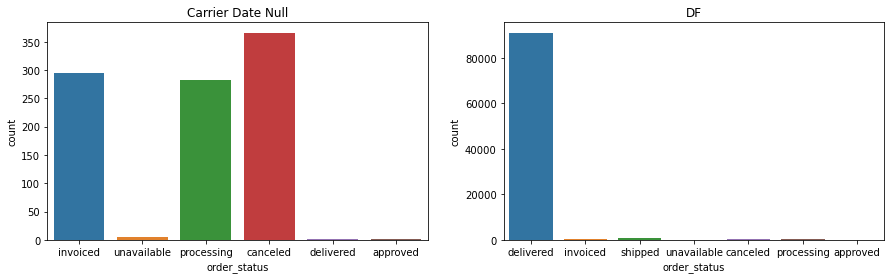

In [925]:
# 배송일자가 없는 데이터와 전체 데이터 order_status 건수 비교
f,ax = plt.subplots(1, 2, figsize = (15,4))

sns.countplot(data = temp, x = 'order_status', ax = ax[0])
ax[0].set_title('Carrier Date Null')

sns.countplot(data = df, x = 'order_status', ax = ax[1])
ax[1].set_title('DF')

Text(0.5, 1.0, 'DF')

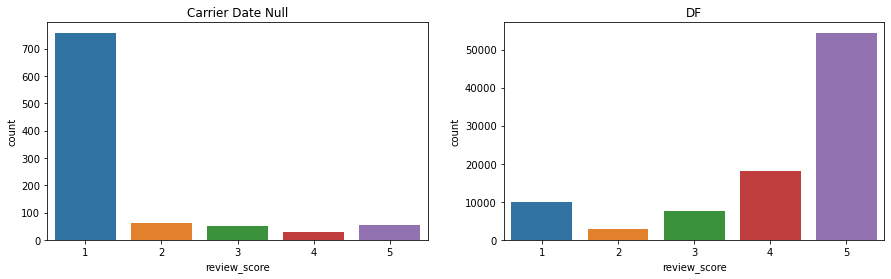

In [926]:
# 배송일자가 없는 데이터와 전체 데이터 review_score 건수 비교
f,ax = plt.subplots(1, 2, figsize = (15,4))

sns.countplot(data = temp, x = 'review_score', ax = ax[0])
ax[0].set_title('Carrier Date Null')

sns.countplot(data = df, x = 'review_score', ax = ax[1])
ax[1].set_title('DF')

- 배송일자가 없는 데이터는 주문이 취소되었거나 주문 진행중인 데이터가 대부분으로, review_score가 낮은 것으로 확인됨
- 해당 데이터의 배송일자 관련 피쳐엔지니어링 컬럼은 nan값으로 두고 진행키로 함

## ★컬럼 삭제 및 추가

### 추후 분석을 위해 전체 데이터 있는 데이터셋은 df_full에 저장

In [927]:
df_full = df.copy()

In [928]:
df = df.drop(['product_id', 'shipping_limit_date', 'customer_id', 'order_approved_at', 'review_id', 
              'review_comment_title', 'review_comment_message', 'review_answer_timestamp', 'product_category_name',
              'product_name_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
              'product_category_name_english'], axis = 1).rename(columns = {'new_category' : 'category'})
df.head(1)

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.3,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,2018-04,5,2018-04-28 00:00:00,287.0,1.0,beauty,SP,SP,1.0,1.0


In [929]:
df.isnull().sum()

order_id                         0   
seller_id                        0   
price                            0   
freight_value                    0   
item_num                         0   
total_payment                    0   
order_status                     0   
order_purchase_timestamp         0   
order_delivered_carrier_date     952 
order_delivered_customer_date    2064
order_estimated_delivery_date    0   
purchase_month                   0   
review_score                     0   
review_creation_date             0   
product_description_lenght       0   
product_photos_qty               0   
category                         0   
seller_state                     0   
customer_state                   0   
payment_sequential               1   
payment_installments             1   
dtype: int64

### 날짜관련 컬럼 dtype 수정

In [930]:
# 날짜 관련 컬럼 datetime 타입으로 변환
df.loc[:, 'order_purchase_timestamp':'order_estimated_delivery_date'] = df.loc[:, 'order_purchase_timestamp':'order_estimated_delivery_date'].apply(pd.to_datetime)
df.loc[:, 'review_creation_date'] = df.loc[:, 'review_creation_date'].apply(pd.to_datetime)

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93078 entries, 0 to 101565
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93078 non-null  object        
 1   seller_id                      93078 non-null  object        
 2   price                          93078 non-null  float64       
 3   freight_value                  93078 non-null  float64       
 4   item_num                       93078 non-null  int64         
 5   total_payment                  93078 non-null  float64       
 6   order_status                   93078 non-null  object        
 7   order_purchase_timestamp       93078 non-null  datetime64[ns]
 8   order_delivered_carrier_date   92126 non-null  datetime64[ns]
 9   order_delivered_customer_date  91014 non-null  datetime64[ns]
 10  order_estimated_delivery_date  93078 non-null  datetime64[ns]
 11  purchase_month

### ★ 'delay', 'avg_delivery', 'preparation', 'review_date' 컬럼 생성

- delay : 배달 지연일수 (완료일 - 예정일)
- avg_delivery : 평균 배송일수 (완료일 - 주문일)
- preparation : 제품 준비기간 (발송일 - 주문일)

In [932]:
df['delay'] =  (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['avg_delivery'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['preparation'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days

<AxesSubplot:xlabel='preparation', ylabel='Density'>

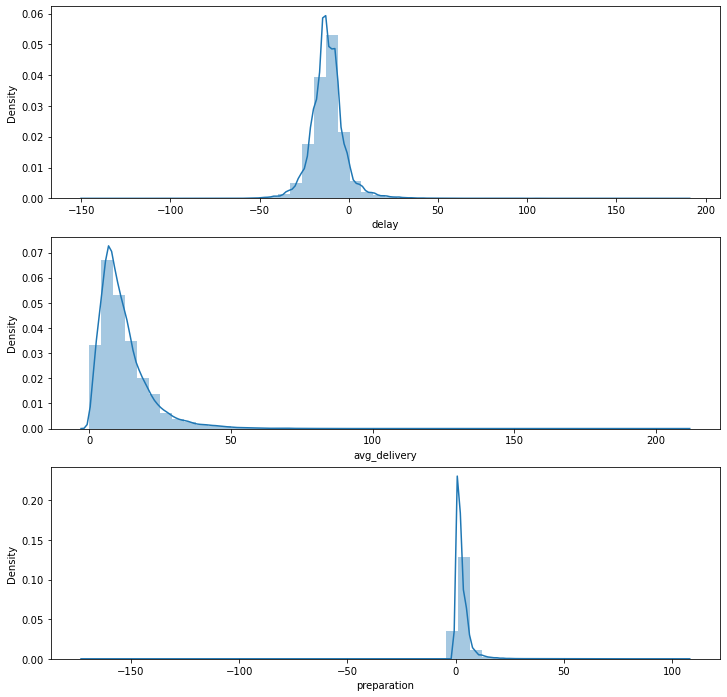

In [933]:
# 새로 생성한 변수 분포 distplot으로 확인
f,ax = plt.subplots(3, 1, figsize = (12,12))

sns.distplot(df['delay'], ax=ax[0])
sns.distplot(df['avg_delivery'], ax=ax[1])
sns.distplot(df['preparation'], ax=ax[2])

In [934]:
# 배달 지연일수 (완료일 - 예정일)
# 147일 일찍 도착 ~ 188일 지연 사이에 분포, 평균적으로 11.8일 일찍 도착함
df['delay'].min(), df['delay'].max(), round(df['delay'].mean(),1)

(-147.0, 188.0, -11.8)

In [935]:
# 100일+ 빨리 도착한 특이 데이터 확인
# 예정일이 너무 늦은 시점으로 잡혀있었던 경우로 확인됨
df[df['delay'] < -100]

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation
3408,40dc2ba6f322a17626aac6244332828c,1354d51653f645349064725ed204e85e,40.00,14.10,1,54.10,delivered,2017-10-05 21:39:05,2017-10-09 12:13:58,2017-10-13 13:49:07,2018-01-30,2017-10,5,2017-10-14,915.0,1.0,culture,SP,RJ,1.0,5.0,-109.0,7.0,3.0
19091,c2bb89b5c1dd978d507284be78a04cb2,7a241947449cc45dbfda4f9d0798d9d0,99.99,61.44,2,322.86,delivered,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,2017-05,5,2017-06-10,914.0,5.0,home_appliances,MG,SP,1.0,15.0,-124.0,16.0,5.0
25997,eec7f369423b033e549c02f3c5381205,903037660cf848a717166eb7a06d616e,252.99,19.02,1,272.01,delivered,2018-02-06 20:44:56,2018-02-15 20:42:12,2018-02-27 16:35:43,2018-07-12,2018-02,3,2018-02-28,192.0,1.0,furniture,SP,RS,1.0,6.0,-135.0,20.0,8.0
30105,0607f0efea4b566f1eb8f7d3c2397320,903037660cf848a717166eb7a06d616e,62.99,10.09,2,146.16,delivered,2018-03-06 09:47:07,2018-03-07 21:33:39,2018-03-09 23:36:47,2018-08-03,2018-03,5,2018-03-10,229.0,1.0,furniture,SP,SP,1.0,3.0,-147.0,3.0,1.0
99033,c72727d29cde4cf870d569bf65edabfd,fce62094ffe6a4009188ec44e681dfdd,25.90,26.09,1,51.99,delivered,2017-02-07 18:01:15,2017-02-10 05:32:55,2017-02-14 14:27:45,2017-07-04,2017-02,5,2017-02-15,1044.0,1.0,others,SP,MA,1.0,1.0,-140.0,6.0,2.0


In [936]:
# 평균 배송일수 (완료일 - 주문일)
# 0 ~ 209일 사이에 분포, 평균 12.1일 소요
df['avg_delivery'].min(), df['avg_delivery'].max(), round(df['avg_delivery'].mean(),1)

(0.0, 209.0, 12.1)

In [937]:
# 제품 준비기간 (발송일 - 주문일)
# 준비기간이 -인 이상치 발견
df['preparation'].min(), df['preparation'].max(), round(df['preparation'].mean(),1)

(-172.0, 107.0, 2.7)

In [938]:
# 이상치 확인
df[df['order_delivered_carrier_date'] < df['order_purchase_timestamp']]

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation
3632,1046a71a57b33b4a92f9f932237f1ab0,921323538c9f1c4e816f2720eac02bea,25.99,18.28,1,44.27,delivered,2018-07-31 13:56:17,2018-07-31 12:57:00,2018-08-03 17:12:13,2018-08-17,2018-07,5,2018-08-04,128.0,1.0,sports,SP,GO,1.0,1.0,-14.0,3.0,-1.0
3794,55b653f93de6e994b6dda90f615c7a8f,d566c37fa119d5e66c4e9052e83ee4ea,35.90,15.23,1,51.13,delivered,2018-04-30 13:05:23,2018-04-30 13:01:00,2018-05-04 18:03:43,2018-05-21,2018-04,5,2018-05-05,382.0,2.0,sports,SP,PR,1.0,1.0,-17.0,4.0,-1.0
4018,15e67a6eec264915cd81f8f57dbacd81,ee2fbacc2fc3794e656cc4d933d59ce7,149.99,16.15,2,332.28,delivered,2018-08-07 14:05:50,2018-08-07 12:39:00,2018-08-13 13:58:45,2018-08-21,2018-08,5,2018-08-14,1449.0,3.0,sports,SP,RJ,1.0,4.0,-8.0,5.0,-1.0
5340,6f09086a54ed13a7f152d6339e2ee5a3,0dd184061fb0eaa7ca37932c68ab91c5,99.00,44.49,1,143.49,delivered,2018-06-26 09:51:04,2018-06-26 09:08:00,2018-06-28 16:32:10,2018-07-20,2018-06,5,2018-06-29,1274.0,2.0,sports,SP,MG,1.0,1.0,-22.0,2.0,-1.0
5345,97d3870e43e40f4dcac70eec95a6b146,0dd184061fb0eaa7ca37932c68ab91c5,99.00,44.61,1,143.61,delivered,2018-08-10 12:23:32,2018-08-10 12:11:00,2018-08-23 22:48:34,2018-09-18,2018-08,5,2018-08-24,1274.0,2.0,sports,SP,PI,1.0,2.0,-26.0,13.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98682,1c723386781fca8d1e45ac747914962a,1927cdb9fa74f5270097f6250e8e8f34,120.00,58.92,1,178.92,delivered,2018-08-06 15:47:47,2018-08-06 15:06:00,2018-08-14 18:53:24,2018-08-23,2018-08,5,2018-08-15,72.0,1.0,food_drink,SP,ES,1.0,1.0,-9.0,8.0,-1.0
98764,69aca49c98f05af05bec6fa1f87a3059,141440cad9341e553f8401c574a2aa38,119.80,27.79,1,147.59,delivered,2018-07-20 13:19:19,2018-07-20 12:01:00,2018-07-25 17:03:35,2018-08-14,2018-07,5,2018-07-26,467.0,1.0,food_drink,PR,RJ,1.0,2.0,-20.0,5.0,-1.0
99701,f379762648ae96c1d04844ca3308df86,4a3ca9315b744ce9f8e9374361493884,77.90,23.35,1,101.25,delivered,2018-08-03 14:09:07,2018-08-03 13:55:00,2018-08-08 18:51:39,2018-08-21,2018-08,5,2018-08-09,176.0,1.0,home_living,SP,PR,1.0,7.0,-13.0,5.0,-1.0
100438,ede6a833580744e002b0ee65323a3006,402916f742e5c740cc751493d9cf5053,100.00,18.80,2,237.60,delivered,2018-08-17 15:11:53,2018-08-17 14:07:00,2018-08-22 19:28:52,2018-09-12,2018-08,5,2018-08-23,2690.0,1.0,food_drink,MG,SP,1.0,2.0,-21.0,5.0,-1.0


In [939]:
df.loc[df['order_delivered_carrier_date'] < df['order_purchase_timestamp'], 'preparation'].value_counts()

-1.0      155
-172.0    1  
-5.0      1  
Name: preparation, dtype: int64

In [940]:
# 시스템 오류인 데이터로 보이며, 정확한 분석을 위해 해당 데이터는 삭제
preparation_check_index = df.loc[(df['order_delivered_carrier_date'] < df['order_purchase_timestamp']), 'order_id'].to_list()

In [941]:
df = df[~df['order_id'].isin(preparation_check_index)]
df

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.30,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,2018-04,5,2018-04-28,287.0,1.0,beauty,SP,SP,1.0,1.0,-12.0,3.0,1.0
1,048cc42e03ca8d43c729adf6962cb348,7040e82f899a04d1b434b795a43b4617,16.90,7.78,1,24.68,delivered,2017-11-16 21:28:00,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29,2017-11,5,2017-11-24,346.0,2.0,beauty,SP,SP,1.0,1.0,-6.0,6.0,5.0
2,5fa78e91b5cb84b6a8ccc42733f95742,7040e82f899a04d1b434b795a43b4617,16.90,7.78,1,24.68,delivered,2017-11-30 01:51:23,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18,2017-11,2,2017-12-14,346.0,2.0,beauty,SP,SP,1.0,1.0,-5.0,13.0,8.0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,fe2032dab1a61af8794248c8196565c9,339.00,17.13,1,356.13,delivered,2017-07-28 09:34:29,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21,2017-07,5,2017-08-09,150.0,1.0,beauty,SP,RJ,1.0,4.0,-13.0,11.0,0.0
4,7b13c77c64a9a956500cbf1a9a23798d,7178f9f4dd81dcef02f62acdf8151e01,275.00,23.48,1,298.48,delivered,2018-05-17 09:24:18,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05,2018-05,3,2018-06-07,150.0,1.0,beauty,SC,SP,1.0,5.0,2.0,21.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,7ed69fbc79fbda50e09caa9c127026e5,4e922959ae960d389249c378d1c939f5,65.00,52.58,1,117.58,delivered,2018-04-20 11:30:06,2018-04-20 21:03:34,2018-05-09 23:38:24,2018-05-25,2018-04,5,2018-05-10,117.0,2.0,culture,SP,MA,1.0,6.0,-16.0,19.0,0.0
101562,9c782cb7854e5dfa91927cfca8949eb8,4e922959ae960d389249c378d1c939f5,45.00,16.11,1,61.11,delivered,2017-07-10 11:26:19,2017-07-12 20:40:54,2017-07-18 18:29:36,2017-08-08,2017-07,5,2017-07-19,117.0,2.0,culture,SP,RJ,1.0,3.0,-21.0,8.0,2.0
101563,cea54c1853c864ab36cea3ef732d7191,4e922959ae960d389249c378d1c939f5,65.00,9.94,1,74.94,delivered,2017-11-04 09:48:44,2017-11-07 21:06:48,2017-11-14 21:37:04,2017-11-27,2017-11,5,2017-11-15,117.0,2.0,culture,SP,SP,1.0,7.0,-13.0,10.0,3.0
101564,d4e8d3bb5e3673ed68ac154fe86de946,4e922959ae960d389249c378d1c939f5,45.00,16.11,1,61.11,delivered,2017-10-24 11:15:05,2017-10-26 20:52:47,2017-11-03 18:57:44,2017-11-29,2017-10,5,2017-11-04,117.0,2.0,culture,SP,RS,1.0,4.0,-26.0,10.0,2.0


<AxesSubplot:xlabel='preparation', ylabel='Density'>

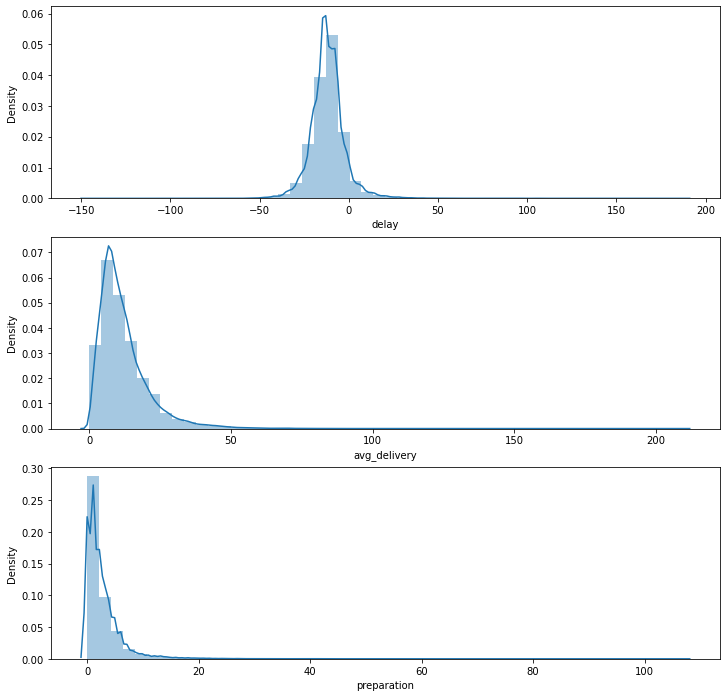

In [942]:
f,ax = plt.subplots(3, 1, figsize = (12,12))

sns.distplot(df['delay'], ax=ax[0])
sns.distplot(df['avg_delivery'], ax=ax[1])
sns.distplot(df['preparation'], ax=ax[2])

### ★'error' 컬럼 만들기

In [943]:
# 완료일 - 예정일을 계산한 delay 컬럼값이 0 이상인 건은 배송예정일보다 늦게 도착한 건으로, review_score가 낮을 것으로 예상
df[df['delay'] > 0].review_score.value_counts()

1    3374
5    1024
3    688 
4    629 
2    536 
Name: review_score, dtype: int64

In [944]:
# 'error' 컬럼 만들어서 delay 컬럼값이 0보다 크거나 결측치인 경우 1로 표시, 나머지 데이터는 0으로 표시
df['error'] = 0

In [945]:
df.loc[df['delay'] > 0, 'error'] = 1
df.head()

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation,error
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.30,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,2018-04,5,2018-04-28,287.0,1.0,beauty,SP,SP,1.0,1.0,-12.0,3.0,1.0,0
1,048cc42e03ca8d43c729adf6962cb348,7040e82f899a04d1b434b795a43b4617,16.90,7.78,1,24.68,delivered,2017-11-16 21:28:00,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29,2017-11,5,2017-11-24,346.0,2.0,beauty,SP,SP,1.0,1.0,-6.0,6.0,5.0,0
2,5fa78e91b5cb84b6a8ccc42733f95742,7040e82f899a04d1b434b795a43b4617,16.90,7.78,1,24.68,delivered,2017-11-30 01:51:23,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18,2017-11,2,2017-12-14,346.0,2.0,beauty,SP,SP,1.0,1.0,-5.0,13.0,8.0,0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,fe2032dab1a61af8794248c8196565c9,339.00,17.13,1,356.13,delivered,2017-07-28 09:34:29,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21,2017-07,5,2017-08-09,150.0,1.0,beauty,SP,RJ,1.0,4.0,-13.0,11.0,0.0,0
4,7b13c77c64a9a956500cbf1a9a23798d,7178f9f4dd81dcef02f62acdf8151e01,275.00,23.48,1,298.48,delivered,2018-05-17 09:24:18,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05,2018-05,3,2018-06-07,150.0,1.0,beauty,SC,SP,1.0,5.0,2.0,21.0,14.0,1


In [946]:
df['error'].value_counts()

0    86670
1    6251 
Name: error, dtype: int64

### ★'canceled' 컬럼 만들기

In [947]:
# 'canceled' 컬럼 만들어서 order_status 컬럼값이 'canceled'면 1로 표시, 나머지 데이터는 0으로 표시
df['canceled'] = 0

In [948]:
df.loc[df['order_status'] == 'canceled', 'canceled'] = 1
df.head(1)

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation,error,canceled
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.3,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,2018-04,5,2018-04-28,287.0,1.0,beauty,SP,SP,1.0,1.0,-12.0,3.0,1.0,0,0


In [949]:
df['canceled'].value_counts()

0    92484
1    437  
Name: canceled, dtype: int64

### ★'freight_ratio' 컬럼 만들기

In [950]:
df['freight_ratio'] = df['freight_value'] / (df['total_payment'])
df.head(1)

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation,error,canceled,freight_ratio
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.3,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,2018-04,5,2018-04-28,287.0,1.0,beauty,SP,SP,1.0,1.0,-12.0,3.0,1.0,0,0,0.403825


### ★review_score_class 컬럼 만들기(목표변수)

In [951]:
# 'review_score_class' 컬럼 만들어서 review_score 컬럼값이 0~3이면 1로 표시, 4~5면 0으로 표시
df['review_score_class'] = 0

In [952]:
df.loc[df['review_score'] <= 3, 'review_score_class'] = 1
df.head(1)

,order_id,seller_id,price,freight_value,item_num,total_payment,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_creation_date,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,delay,avg_delivery,preparation,error,canceled,freight_ratio,review_score_class
0,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1,18.3,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,2018-04,5,2018-04-28,287.0,1.0,beauty,SP,SP,1.0,1.0,-12.0,3.0,1.0,0,0,0.403825,0


<AxesSubplot:>

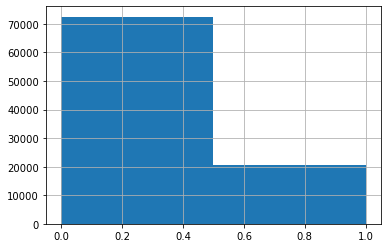

In [953]:
df['review_score_class'].hist(bins = 2)

### 분석기간 재설정

In [954]:
# 구매월별 매출건수 확인
df.groupby('purchase_month')['order_id'].count()

purchase_month
2016-09    2   
2016-10    291 
2016-12    1   
2017-01    731 
2017-02    1614
2017-03    2477
2017-04    2229
2017-05    3394
2017-06    3014
2017-07    3716
2017-08    4010
2017-09    3998
2017-10    4298
2017-11    6991
2017-12    5273
2018-01    6707
2018-02    6250
2018-03    6800
2018-04    6584
2018-05    6554
2018-06    5854
2018-07    5974
2018-08    6159
Name: order_id, dtype: int64

In [955]:
# 2016년 9월~12월과 2018년 9월 주문건수는 다른 월에 비해 현저히 낮음
# 서비스 테스트 등 다른 이슈가 있었던 기간이었을 가능성이 있다고 보고 해당 월은 분석에서 제외
df = df[~df['purchase_month'].isin(['2016-09', '2016-10', '2016-12', '2018-09'])]
df.groupby('purchase_month')['order_id'].count()

purchase_month
2017-01    731 
2017-02    1614
2017-03    2477
2017-04    2229
2017-05    3394
2017-06    3014
2017-07    3716
2017-08    4010
2017-09    3998
2017-10    4298
2017-11    6991
2017-12    5273
2018-01    6707
2018-02    6250
2018-03    6800
2018-04    6584
2018-05    6554
2018-06    5854
2018-07    5974
2018-08    6159
Name: order_id, dtype: int64

## review_score 분포 확인

In [956]:
# 월별 review_score 평균
df_month = df.groupby('purchase_month')['review_score'].agg('mean').reset_index()
df_month

,purchase_month,review_score
0,2017-01,4.093023
1,2017-02,4.094176
2,2017-03,4.117481
3,2017-04,4.042620
4,2017-05,4.162345
5,2017-06,4.179496
6,2017-07,4.230893
7,2017-08,4.260599
8,2017-09,4.221361
9,2017-10,4.181480


<AxesSubplot:xlabel='purchase_month', ylabel='review_score'>

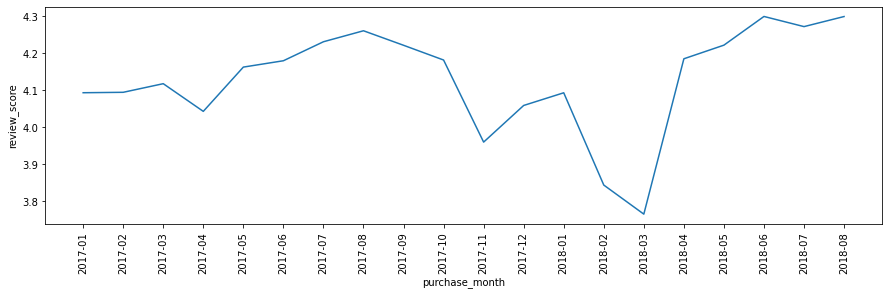

In [957]:
# 2017년 11월 ~ 2018년 3월에 review_score 평균이 상대적으로 낮았음을 확인
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.lineplot(data = df_month, x = 'purchase_month', y = 'review_score')

In [958]:
# 제품 카테고리별 review_score 평균
df_category = df.groupby('category')['review_score'].agg('mean').sort_values(ascending = False).reset_index()
df_category

,category,review_score
0,book,4.445153
1,pet,4.272450
2,food_drink,4.253191
3,beauty,4.194554
4,sports,4.178741
5,fashion,4.171776
6,garden_tools,4.170843
7,stationery,4.167460
8,culture,4.163306
9,home_appliances,4.157997


## 데이터 최종 정리

<AxesSubplot:xlabel='category', ylabel='review_score'>

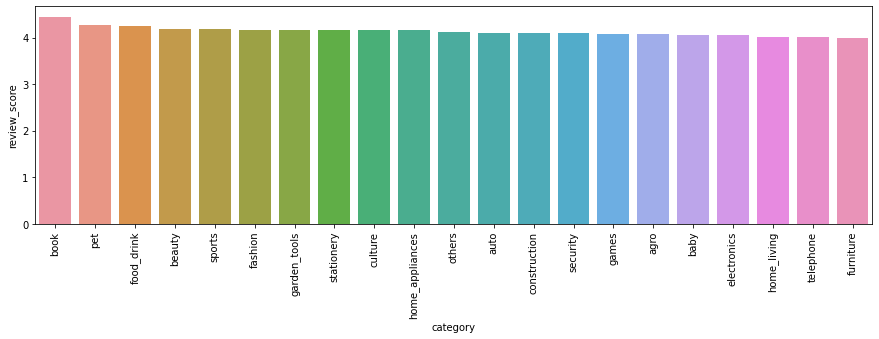

In [959]:
# 제품 카테고리별 review_score 평균에 일부 차이가 있음을 확인
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.barplot(data = df_category, x = 'category', y = 'review_score')

### 불필요 컬럼 삭제

In [960]:
# 셀러별 review_score 평균
df_random_seller = df.groupby('seller_id')['review_score'].agg('mean').sort_values(ascending = False).reset_index().sample(20)
df_random_index = df_random_seller['seller_id'].tolist()

In [961]:
df = df_full2.copy()

In [962]:
# 셀러 20명을 랜덤 추출하여 review_score 분포 확인
df_random = df.loc[df['seller_id'].isin(df_random_index), ['seller_id', 'review_score']].reset_index()
df_random

,index,seller_id,review_score
0,3458,968268a686aa05d1f529fb07dff08130,3
1,4039,7e93a43ef30c4f03f38b393420bc753a,5
2,4040,7e93a43ef30c4f03f38b393420bc753a,5
3,4358,5e49e3a44bdeb5aab2684258bbd4f525,5
4,4700,71039d19d4303bf9054d69e9a9236699,4
...,...,...,...
546,99933,7e93a43ef30c4f03f38b393420bc753a,5
547,99943,7e93a43ef30c4f03f38b393420bc753a,2
548,99952,7e93a43ef30c4f03f38b393420bc753a,5
549,100076,ede0c03645598cdfc63ca8237acbe73d,1


In [963]:
df = df_full2.copy()

<AxesSubplot:xlabel='seller_id', ylabel='review_score'>

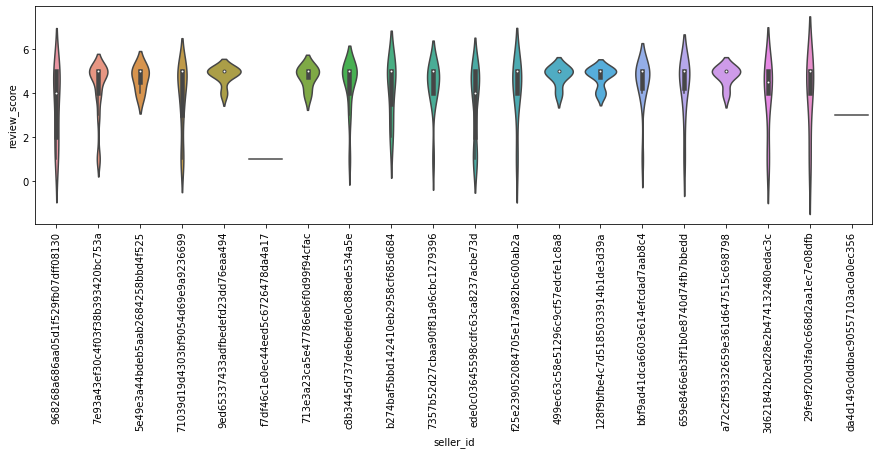

In [964]:
# 셀러마다 판매건수가 달라 review_score 분포도 다양한 형태로 나타남
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.violinplot(data = df_random, x = 'seller_id', y = 'review_score')

In [965]:
# order_status별 review_score 평균
df_status = df.groupby('order_status')['review_score'].agg('mean').sort_values(ascending = False).reset_index()
df_status

,order_status,review_score
0,delivered,4.174015
1,approved,2.500000
2,shipped,2.000000
3,invoiced,1.610714
4,canceled,1.555294
5,processing,1.264286


<AxesSubplot:xlabel='order_status', ylabel='review_score'>

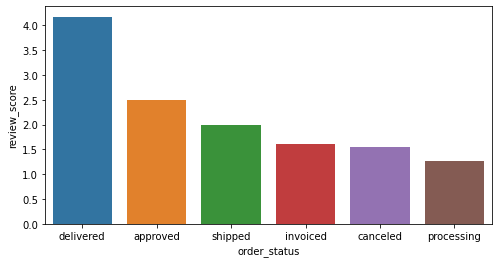

In [966]:
plt.figure(figsize = (8, 4))
sns.barplot(data = df_status, x = 'order_status', y = 'review_score')

In [967]:
# seller_state별 판매건수는 São Paulo(SP)가 압도적으로 많음
df_city = df.groupby('seller_state')['review_score'].agg(['mean','count']).sort_values(by = 'count', ascending = False)
df_city

,mean,count
seller_state,,
SP,4.093520,65002
MG,4.201978,7481
PR,4.173072,7234
RJ,4.172825,4195
SC,4.182423,3607
RS,4.300107,1866
DF,4.072956,795
BA,4.114082,561
GO,4.313364,434


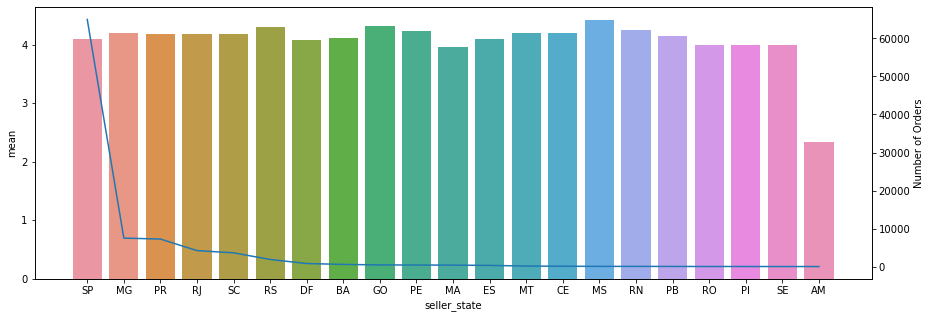

In [968]:
# state별로 평균 review_score의 평균이 다름을 확인할 수 있음
# 셀러가 Amazonas(AM) 주에 있는 경우 review_score 평균이 가장 낮음

fig, ax1 = plt.subplots(figsize = (15,5))
ax1.set_xlabel('State')
ax1.set_ylabel('Review Score')
ax1 = sns.barplot(x = df_city.index, y = 'mean', data = df_city)
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Orders')
ax2 = sns.lineplot(x = df_city.index, y = 'count', data = df_city, sort=False)
ax2.tick_params(axis = 'y')

plt.show()

## 불필요 컬럼 제거

<AxesSubplot:>

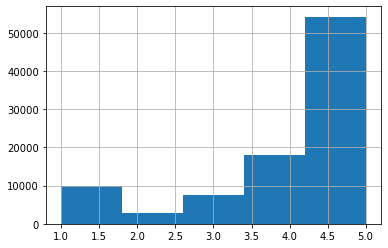

In [969]:
# 전체 review_score
df['review_score'].hist(bins = 5)

In [970]:
df_full2 = df.copy()

In [971]:
df.columns

Index(['order_id', 'seller_id', 'price', 'freight_value', 'item_num',
       'total_payment', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'purchase_month', 'review_score',
       'review_creation_date', 'product_description_lenght',
       'product_photos_qty', 'category', 'seller_state', 'customer_state',
       'payment_sequential', 'payment_installments', 'delay', 'avg_delivery',
       'preparation', 'error', 'freight_ratio', 'review_score_class'],
      dtype='object')

In [972]:
df = df.drop(['order_id', 'seller_id', 'price', 'freight_value', 'order_status', 'order_purchase_timestamp', 
              'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
              'purchase_month', 'review_score', 'review_creation_date', 'delay', 'avg_delivery', 'preparation'], axis = 1)
df.head(1)

,item_num,total_payment,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,error,freight_ratio,review_score_class
0,1,18.3,287.0,1.0,beauty,SP,SP,1.0,1.0,0,0.403825,0


## 연속형 변수와 목표변수 상관관계

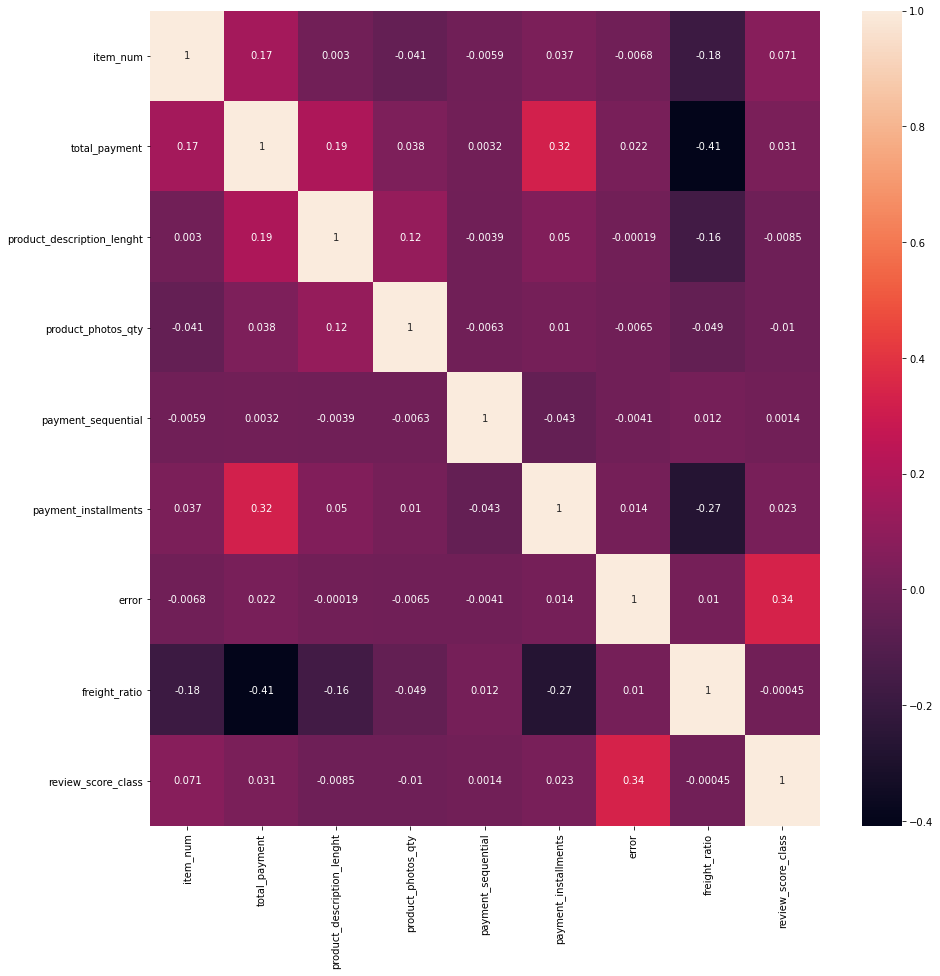

In [973]:
plt.figure(figsize = (15,15))
plt.yticks(rotation = 0)
g = sns.heatmap(df.corr(), annot = True)

# ★review_score_class 분류모델 (1: 1-3점, 0: 4-5점)

## 목표변수 및 입력변수 설정

In [975]:
label = df['review_score_class']

In [980]:
# 범주형 변수 라벨인코딩, 원핫인코딩을 각각 진행해보기 위해 데이터셋 복제
df_le = df.copy()
df_ohe = df.copy()

## 범주형 변수 라벨인코딩

### 입력변수 설정

In [981]:
# 입력변수 데이터셋
data = df_le.drop(['review_score_class'], axis = 1)

In [982]:
state_name = geo_full['geolocation_state'].drop_duplicates().reset_index(drop = True)

In [983]:
# state 정보 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(state_name)

LabelEncoder()

In [984]:
le.classes_

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [985]:
data['seller_state'] = le.transform(data['seller_state'])
data['customer_state'] = le.transform(data['customer_state'])
data.head()

,item_num,total_payment,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,error,freight_ratio
0,1,18.30,287.0,1.0,beauty,25,25,1.0,1.0,0,0.403825
1,1,24.68,346.0,2.0,beauty,25,25,1.0,1.0,0,0.315235
2,1,24.68,346.0,2.0,beauty,25,25,1.0,1.0,0,0.315235
3,1,356.13,150.0,1.0,beauty,25,18,1.0,4.0,0,0.048100
4,1,298.48,150.0,1.0,beauty,23,25,1.0,5.0,1,0.078665


In [986]:
# category 정보 라벨인코딩
le = LabelEncoder()
data['category'] = le.fit_transform(data['category'])
data.head()

,item_num,total_payment,product_description_lenght,product_photos_qty,category,seller_state,customer_state,payment_sequential,payment_installments,error,freight_ratio
0,1,18.30,287.0,1.0,3,25,25,1.0,1.0,0,0.403825
1,1,24.68,346.0,2.0,3,25,25,1.0,1.0,0,0.315235
2,1,24.68,346.0,2.0,3,25,25,1.0,1.0,0,0.315235
3,1,356.13,150.0,1.0,3,25,18,1.0,4.0,0,0.048100
4,1,298.48,150.0,1.0,3,23,25,1.0,5.0,1,0.078665


In [987]:
# 범주형, 연속형 변수 분리
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O']
num_columns = [c for c in data.columns if c not in cat_columns]
print('Categorical Columns:\n{}\n\n Numeric Columns:\n{}\n'.format(cat_columns, num_columns))

Categorical Columns:
[]

 Numeric Columns:
['item_num', 'total_payment', 'product_description_lenght', 'product_photos_qty', 'category', 'seller_state', 'customer_state', 'payment_sequential', 'payment_installments', 'error', 'freight_ratio']



In [988]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3,
                                                    random_state=2021,
                                                    shuffle=True)
x_train.shape, x_test.shape

((64838, 11), (27789, 11))

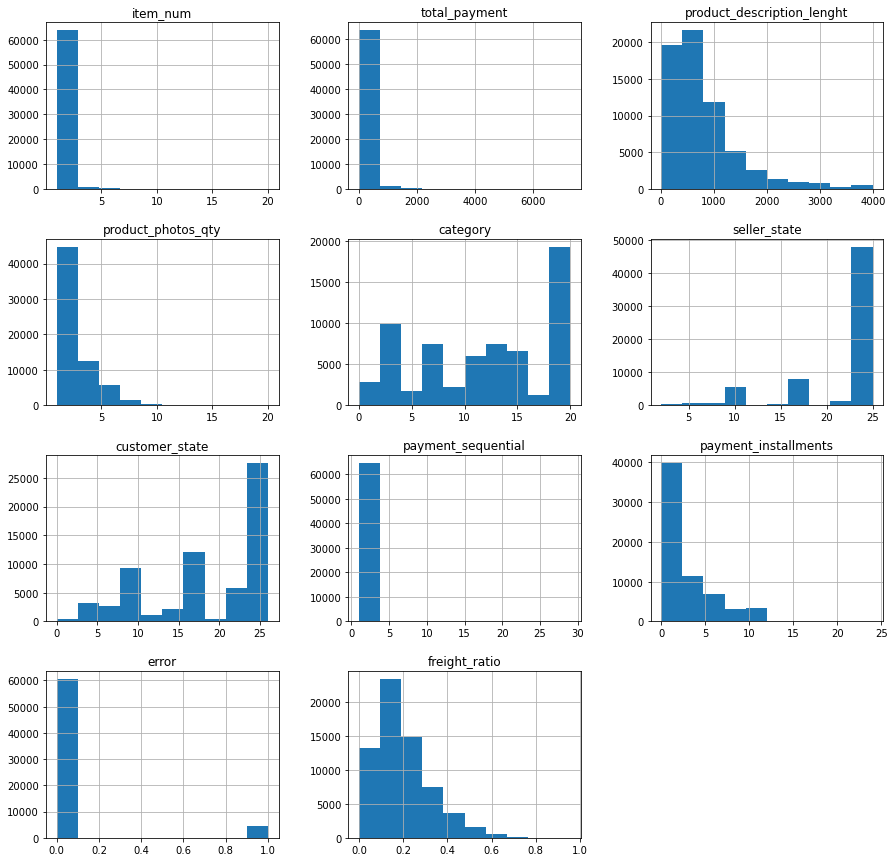

In [989]:
# 컬럼별 분포 확인
g = x_train.hist(figsize = (15, 15))

### 모델 적합 및 평가

In [990]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [['Logistic Regression', LogisticRegression(random_state=2021,
                                                     n_jobs=-1)], 
          ['RandomForest', RandomForestClassifier(random_state=2021,
                                                  n_jobs=-1)], 
          ['XGBoost', XGBClassifier(random_state=2021,
                                    n_jobs=8)], 
          ['LightGBM', LGBMClassifier(random_state=2021,
                                      n_jobs=8)]]

best_f1 = 0

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_f1 = f1_score(y_test, y_pred)
    
    if current_f1 > best_f1:
        best_f1  = current_f1
        best_model = [i, name, model]
                    
    print(f'{name} Model Validation F1_Score: {current_f1}')

print(f'Best Model: {best_model[-1]}, F1_Score: {best_f1}')

Logistic Regression Model Validation F1_Score: 0.2671470509741126
RandomForest Model Validation F1_Score: 0.35237769414984604
[03:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Validation F1_Score: 0.34368787276341944
LightGBM Model Validation F1_Score: 0.3403239984930303
Best Model: RandomForestClassifier(n_jobs=-1, random_state=2021), F1_Score: 0.35237769414984604


In [1015]:
print('Accuracy : {:.3f}'.format(accuracy_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('Precision : {:.3f}'.format(precision_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('Recall : {:.3f}'.format(recall_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('F1 Score: {:.3f}'.format(f1_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('AUC : {:.3f}'.format(roc_auc_score(y_test, y_score = best_model[-1].predict(x_test))))

Accuracy : 0.793
Precision : 0.566
Recall : 0.253
F1 Score: 0.350
AUC : 0.599


<AxesSubplot:>

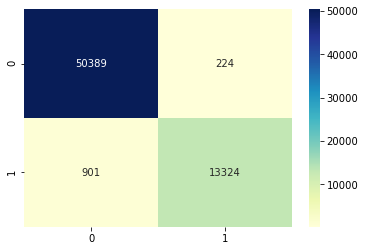

In [1017]:
from sklearn.metrics import classification_report, confusion_matrix

# train set
cm = confusion_matrix(y_train, best_model[-1].predict(x_train))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')

<AxesSubplot:>

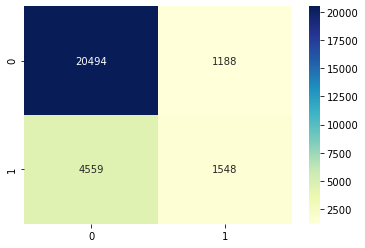

In [1019]:
# test set
cm = confusion_matrix(y_test, y_pred = best_model[-1].predict(x_test))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')

## 범주형 변수 원핫인코딩

### 입력변수 설정

In [999]:
# 입력변수 데이터셋
data = df_ohe.drop(['review_score_class'], axis = 1)

In [1000]:
# 전처리함수
from sklearn.preprocessing import OneHotEncoder

def preprocess(x_train, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_test  = x_test.copy()
    
    # reset index
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    # cat_columns 원핫인코딩
    ohe = OneHotEncoder(sparse=False)
    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)

    new_x_all = ohe.fit_transform(x_all)
    
    ohe_columns = []
    for cat in ohe.categories_:
        ohe_columns += cat.tolist()
    
    new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)

    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_test

In [1001]:
# 범주형, 연속형 변수 분리
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O']
num_columns = [c for c in data.columns if c not in cat_columns]
print('Categorical Columns:\n{}\n\n Numeric Columns:\n{}\n'.format(cat_columns, num_columns))

Categorical Columns:
['category', 'seller_state', 'customer_state']

 Numeric Columns:
['item_num', 'total_payment', 'product_description_lenght', 'product_photos_qty', 'payment_sequential', 'payment_installments', 'error', 'freight_ratio']



In [1002]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3,
                                                    random_state=2021,
                                                    shuffle=True)
x_train.shape, x_test.shape

((64838, 11), (27789, 11))

In [1003]:
x_train, x_test = preprocess(x_train, x_test)
x_train.shape, x_test.shape

((64838, 77), (27789, 77))

In [1004]:
# seller_state, customer_state는 원핫인코딩시 컬럼명에 중복이 발생하므로 customer_state 컬럼명에 c 추가
x_train.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']

In [1005]:
x_test.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']

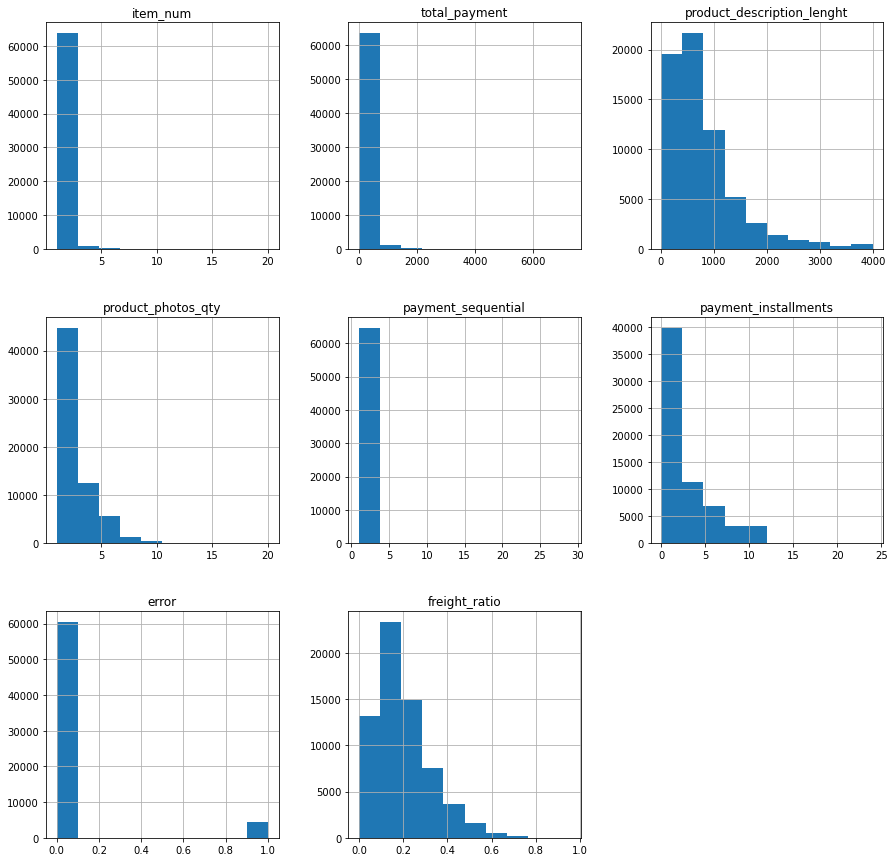

In [1006]:
# 컬럼별 분포 확인
g = x_train[num_columns].hist(figsize = (15, 15))

### 모델 적합 및 평가

In [1007]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [['Logistic Regression', LogisticRegression(random_state=2021,
                                                     n_jobs=-1)], 
          ['RandomForest', RandomForestClassifier(random_state=2021,
                                                  n_jobs=-1)], 
          ['XGBoost', XGBClassifier(random_state=2021,
                                    n_jobs=8)], 
          ['LightGBM', LGBMClassifier(random_state=2021,
                                      n_jobs=8)]]

best_f1 = 0

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_f1 = f1_score(y_test, y_pred)
    
    if current_f1 > best_f1:
        best_f1  = current_f1
        best_model = [i, name, model]
    
    print(f'{name} Model Validation F1_Score: {current_f1}')

print(f'Best Model: {best_model[-1]}, F1_Score: {best_f1}')

Logistic Regression Model Validation F1_Score: 0.33642982676374594
RandomForest Model Validation F1_Score: 0.3501074296053376
[03:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Validation F1_Score: 0.34218730515026813
LightGBM Model Validation F1_Score: 0.34344447229882175
Best Model: RandomForestClassifier(n_jobs=-1, random_state=2021), F1_Score: 0.3501074296053376


In [1020]:
print('Accuracy : {:.3f}'.format(accuracy_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('Precision : {:.3f}'.format(precision_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('Recall : {:.3f}'.format(recall_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('F1 Score: {:.3f}'.format(f1_score(y_test, y_pred = best_model[-1].predict(x_test))))
print('AUC : {:.3f}'.format(roc_auc_score(y_test, y_score = best_model[-1].predict(x_test))))

Accuracy : 0.793
Precision : 0.566
Recall : 0.253
F1 Score: 0.350
AUC : 0.599


<AxesSubplot:>

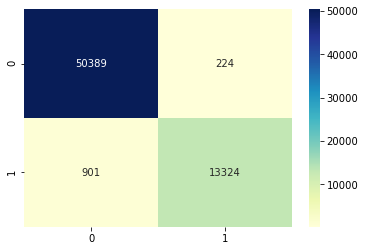

In [1021]:
from sklearn.metrics import classification_report, confusion_matrix

# train set
cm = confusion_matrix(y_train, best_model[-1].predict(x_train))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')

<AxesSubplot:>

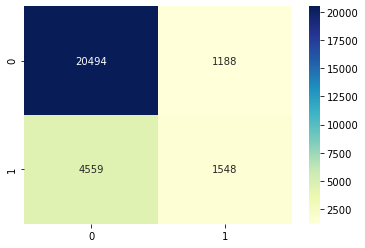

In [1022]:
# test set
cm = confusion_matrix(y_test, y_pred = best_model[-1].predict(x_test))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')

## 라벨인코딩 vs 원핫인코딩 결론

- 범주형 변수를 원핫인코딩으로 처리했을때 평가점수가 라벨인코딩으로 진행했을 때보다 높게 나옴
- 두 경우 모두 train set에 과적합되는 경향이 있었음

## 변수 중요도

### feature importance

In [1024]:
best_model

[1, 'RandomForest', RandomForestClassifier(n_jobs=-1, random_state=2021)]

In [1026]:
best_model[-1].feature_importances_

array([1.28541509e-02, 1.89154602e-01, 1.75265900e-01, 5.45139470e-02,
       9.23399016e-03, 7.68354872e-02, 1.11514793e-01, 1.88576597e-01,
       6.63061223e-04, 4.70432102e-03, 3.66001617e-03, 5.10068943e-03,
       1.30232675e-03, 2.82740140e-03, 1.94989877e-03, 5.71009212e-03,
       2.75733948e-03, 1.74530299e-03, 4.96150291e-03, 2.17332850e-03,
       3.53233611e-03, 6.34720412e-03, 4.16161582e-03, 1.48262711e-03,
       2.49740732e-03, 6.62811210e-04, 5.23603854e-03, 6.60192971e-03,
       3.33832557e-03, 6.06962795e-05, 9.24058202e-04, 2.27999241e-04,
       1.63204970e-03, 6.29992775e-04, 8.70946327e-04, 3.82072676e-04,
       4.93353174e-03, 1.29060118e-04, 4.70643911e-04, 1.80276897e-04,
       6.38941446e-04, 9.89325118e-05, 4.79540902e-03, 3.81402214e-03,
       1.05664840e-04, 8.57862899e-06, 2.15251551e-03, 3.54713446e-03,
       7.84333243e-05, 6.88530339e-03, 5.05698730e-04, 1.20549126e-03,
       5.60383156e-04, 4.41924276e-04, 3.80922308e-03, 2.70491903e-03,
      

In [1027]:
pd.DataFrame(sorted(zip(best_model[-1].feature_importances_, x_train.columns), reverse=True), columns=['Value','Feature'])

,Value,Feature
0,0.189155,total_payment
1,0.188577,freight_ratio
2,0.175266,product_description_lenght
3,0.111515,error
4,0.076835,payment_installments
...,...,...
72,0.000106,RN
73,0.000099,PI
74,0.000078,SE
75,0.000061,AM


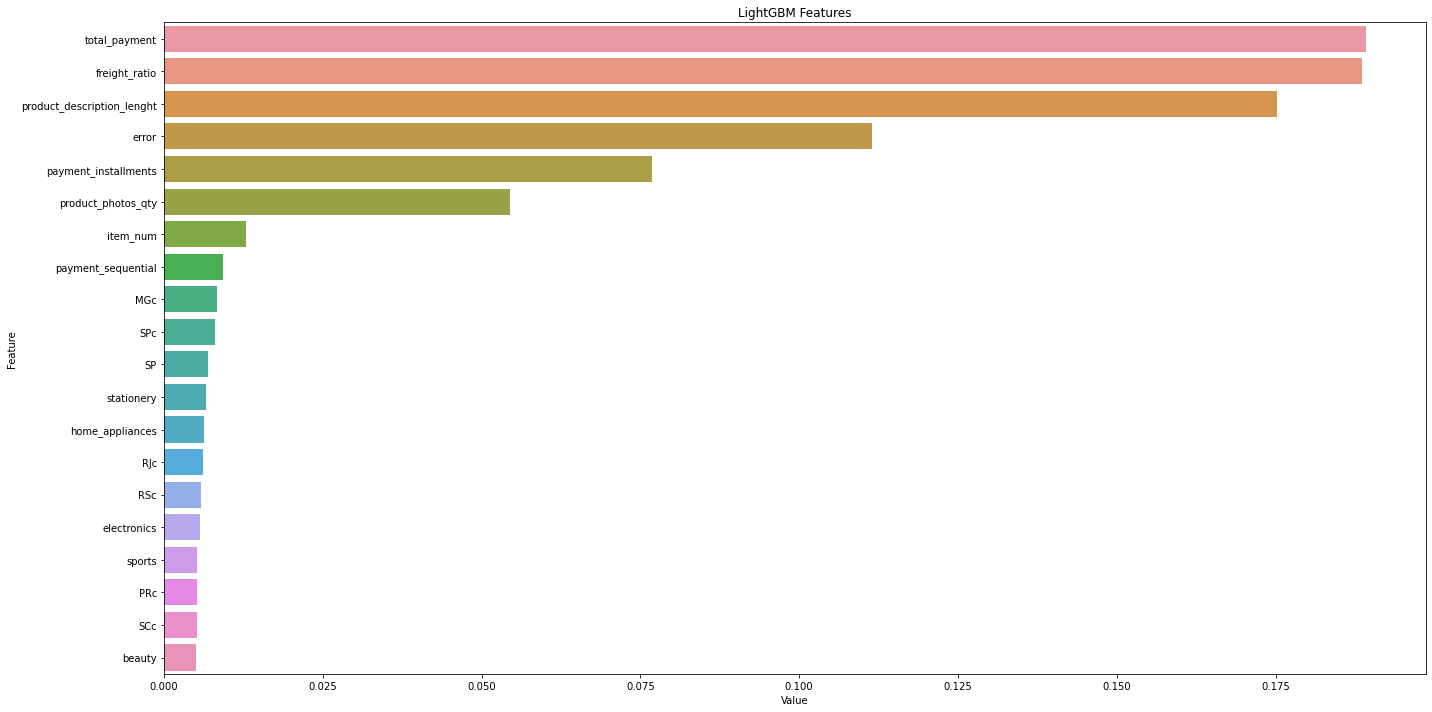

In [1028]:
# Feature importance
feature_imp = pd.DataFrame(sorted(zip(best_model[-1].feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

### permutation importance

In [1029]:
from sklearn.inspection import permutation_importance

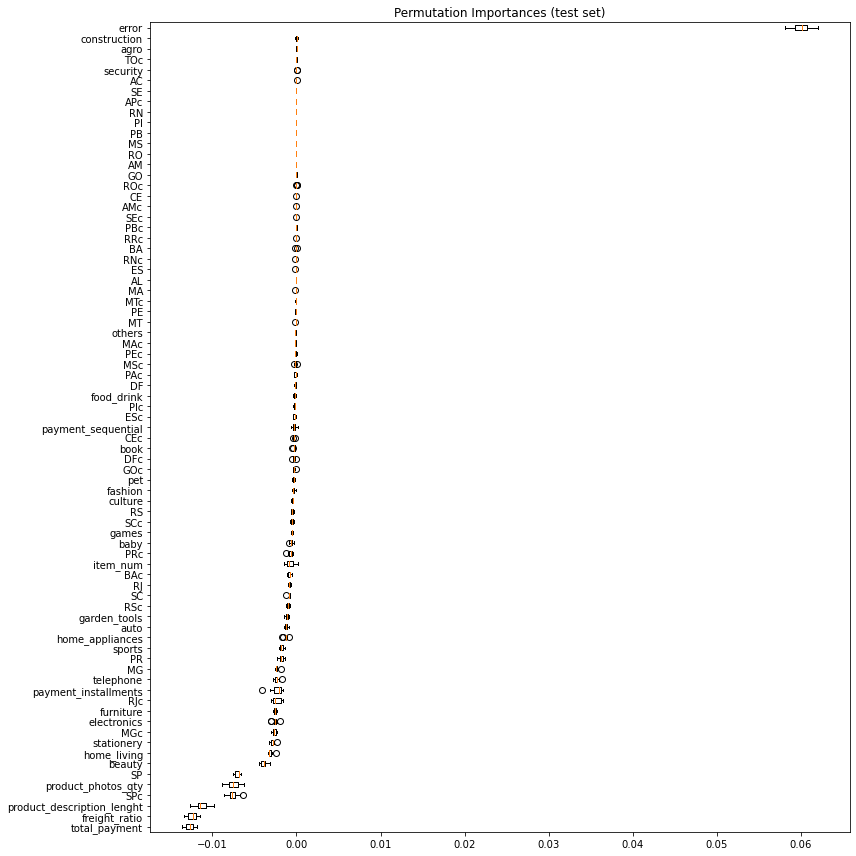

In [1030]:
result = permutation_importance(best_model[-1], x_test, y_test, n_repeats=10,
                                 n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12,12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

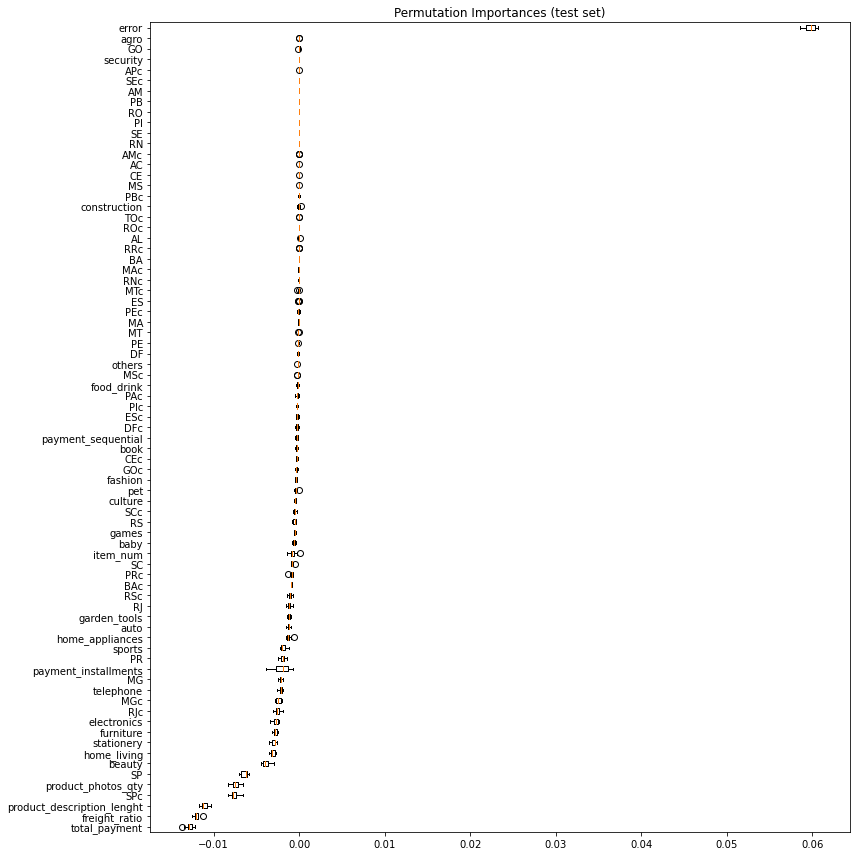

In [1031]:
# 비교용
result = permutation_importance(best_model[-1], x_test, y_test, n_repeats=10,
                                 n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12,12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Cross Validation

### 모델 적합 및 평가

In [1032]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [1036]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

val_scores = list()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx], label.iloc[trn_idx]
    x_test, y_test = data.iloc[val_idx], label.iloc[val_idx]
    
    # 전처리
    x_train, x_test = preprocess(x_train, x_test)
    x_train.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']
    x_test.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']
    
    # 모델 정의
    rf = RandomForestClassifier(random_state=2021, n_jobs=-1)
    
    # 모델 학습
    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    
    # 훈련, 검증 데이터 F1_score 확인
    trn_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_test, y_pred)
    print('{} Fold, train f1_score : {:.4f}, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)

# 교차 검증 rmse_score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train f1_score : 0.9567, validation f1_score : 0.3464
1 Fold, train f1_score : 0.9566, validation f1_score : 0.3594
2 Fold, train f1_score : 0.9583, validation f1_score : 0.3499
3 Fold, train f1_score : 0.9565, validation f1_score : 0.3545
4 Fold, train f1_score : 0.9581, validation f1_score : 0.3501
Cross Validation Score : 0.3521


### CV 결론
- F1_score는 약간 개선되나 train set에 과적합되는 문제 지속

## Hyperparameter Tuning

### GridSearch

In [1059]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[50, 100, 200],
          'max_depth':[10, 15, 20],
         'max_features' : [3, 5, 7]}

rf_tuning = GridSearchCV(best_model[-1], params, n_jobs= -1, scoring='f1')

In [1060]:
rf_tuning.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=2021),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [1051]:
# 1차
# params = {'n_estimators':[100, 500, 1000],
#           'max_depth':[5, 10, 15]}

# print('GridSearchCV best F1 score : {:.4f}, best_params : {}'.format(rf_tuning.best_score_, rf_tuning.best_params_))

GridSearchCV best F1 score : 0.3359, best_params : {'max_depth': 15, 'n_estimators': 100}


In [1055]:
# 2차
# params = {'n_estimators':[50, 100, 200],
#           'max_depth':[10, 15, 20]}

# print('GridSearchCV best F1 score : {:.4f}, best_params : {}'.format(rf_tuning.best_score_, rf_tuning.best_params_))

GridSearchCV best F1 score : 0.3364, best_params : {'max_depth': 15, 'n_estimators': 200}


In [1061]:
# 3차
# params = {'n_estimators':[50, 100, 200],
#           'max_depth':[10, 15, 20],
#          'max_features' : [3, 5, 7]}

print('GridSearchCV best F1 score : {:.4f}, best_params : {}'.format(rf_tuning.best_score_, rf_tuning.best_params_))

GridSearchCV best F1 score : 0.3323, best_params : {'max_depth': 20, 'max_features': 7, 'n_estimators': 100}


In [1057]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

val_scores = list()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx], label.iloc[trn_idx]
    x_test, y_test = data.iloc[val_idx], label.iloc[val_idx]
    
    # 전처리
    x_train, x_test = preprocess(x_train, x_test)
    x_train.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']
    x_test.columns = ['item_num', 'total_payment', 'product_description_lenght',
       'product_photos_qty', 'payment_sequential', 'payment_installments',
       'error', 'freight_ratio', 'agro', 'auto', 'baby', 'beauty', 'book',
       'construction', 'culture', 'electronics', 'fashion', 'food_drink',
       'furniture', 'games', 'garden_tools', 'home_appliances', 'home_living',
       'others', 'pet', 'security', 'sports', 'stationery', 'telephone', 'AM',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'AC', 'AL', 'AMc', 'APc',
       'BAc', 'CEc', 'DFc', 'ESc', 'GOc', 'MAc', 'MGc', 'MSc', 'MTc', 'PAc', 'PBc', 'PEc',
       'PIc', 'PRc', 'RJc', 'RNc', 'ROc', 'RRc', 'RSc', 'SCc', 'SEc', 'SPc', 'TOc']
    
    # 모델 정의
    rf = RandomForestClassifier(random_state=2021, n_jobs=-1,
                                max_depth = 15, n_estimators = 200)
    
    # 모델 학습
    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    
    # 훈련, 검증 데이터 F1_score 확인
    trn_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_test, y_pred)
    print('{} Fold, train f1_score : {:.4f}, validation f1_score : {:.4f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)

# 교차 검증 rmse_score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train f1_score : 0.3608, validation f1_score : 0.3442
1 Fold, train f1_score : 0.3590, validation f1_score : 0.3432
2 Fold, train f1_score : 0.3576, validation f1_score : 0.3420
3 Fold, train f1_score : 0.3607, validation f1_score : 0.3400
4 Fold, train f1_score : 0.3586, validation f1_score : 0.3439
Cross Validation Score : 0.3427


### RandomizedSearch

In [1063]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':(200, 1500),
          'max_depth': (1, 20),
          'max_features' : (5, 10)}

rf_tuning_rs = RandomizedSearchCV(estimator=best_model[-1], 
                                    n_jobs= -1, scoring='f1',
                                    param_distributions = params, cv = 5, verbose = 1)

In [1064]:
rf_tuning_rs.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=2021),
                   n_jobs=-1,
                   param_distributions={'max_depth': (1, 20),
                                        'max_features': [5, 7, 10],
                                        'n_estimators': (200, 1500)},
                   scoring='f1', verbose=1)

In [1065]:
# 1차
print('RanbdomSearchCV best f1 score : {:.4f}, best_params : {}'.format(rf_tuning_rs.best_score_, rf_tuning_rs.best_params_))

RanbdomSearchCV best f1 score : 0.3345, best_params : {'n_estimators': 1500, 'max_features': 10, 'max_depth': 20}


# 결과 EDA

- 이런식으로 하면 되는지?

<AxesSubplot:xlabel='review_score_class', ylabel='delay'>

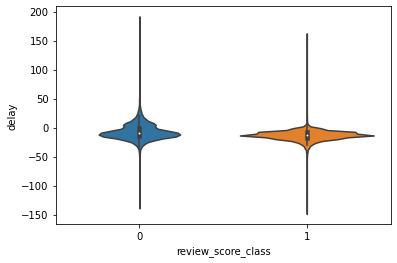

In [212]:
sns.violinplot(data = df_le, x = 'review_score_class', y = 'delay')

<AxesSubplot:xlabel='review_score_class', ylabel='delay'>

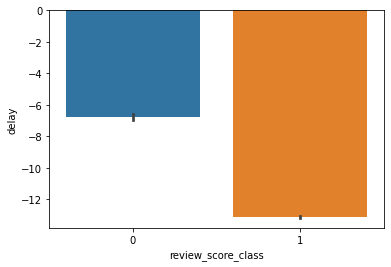

In [233]:
sns.barplot(data = df_le, x = 'review_score_class', y = 'delay')

<AxesSubplot:xlabel='review_score_class', ylabel='avg_delivery'>

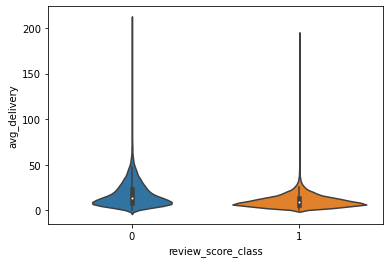

In [226]:
sns.violinplot(data = df_le, x = 'review_score_class', y = 'avg_delivery')

<AxesSubplot:xlabel='review_score', ylabel='product_description_lenght'>

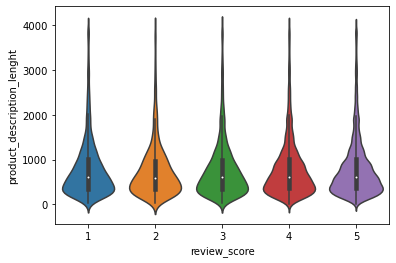

In [237]:
sns.violinplot(data = df_le, x = 'review_score', y = 'product_description_lenght')

<AxesSubplot:xlabel='review_score_class', ylabel='freight_ratio'>

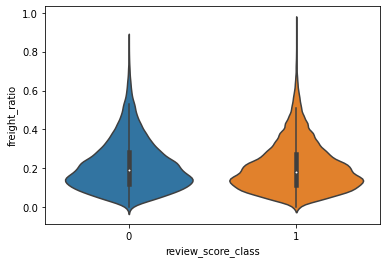

In [234]:
sns.violinplot(data = df_le, x = 'review_score_class', y = 'freight_ratio')

In [ ]:
# ★ 'review_comment_count' 컬럼 만들기
# df.loc[df['review_comment_message'].isnull(), 'review_comment_message'] = 'c'
# df['review_comment_count'] = 0
# for i in range(0, df_full.shape[0]):
#     df_full.iloc[i, 31] = len(df_full.iloc[i, 13])
# # review_score가 낮을수록 리뷰 코멘트 글자수가 많음
# sns.barplot(data = df_full, x = 'review_score', y = 'review_comment_count')

# 결론

- RandomForestClassifier의 성능이 가장 높았으며 CV, hyperparameter tuning로 큰 성능차이 없고 과적합 문제